<a href="https://colab.research.google.com/github/treasure823/Netflix-Movies-and-TV-Shows-Clustering-Unsupervised-Machine-Learning/blob/main/Netflix_Movies_and_TV_Shows_Clustering_Unsupervised_Machine_Learning_Capstone_4_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**   Nidhi Pandey

# **Project Summary -**

**The objective of this project is to analyze and cluster a dataset related to Netflix. The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.**

**To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.**

**Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features.**

**Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

**After the clustering process, the results will be evaluated and interpreted. The clusters will be analyzed to understand the common characteristics and patterns within each group. This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies.**

**Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.**

**In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights and recommendations based on the clustering results. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company.**

# **GitHub Link -**

https://github.com/treasure823/Netflix-Movies-and-TV-Shows-Clustering-Unsupervised-Machine-Learning

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.
In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [154]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
# Load Dataset
path = '/content/drive/MyDrive/Netflix Movies and TV Shows Clustering_Unsupervised Machine Learning_Capstone 4 _roject/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

### Dataset First View

In [157]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [158]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

In [159]:
df['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Dataset Rows & Columns count

In [161]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

In [162]:
df.index

RangeIndex(start=0, stop=7787, step=1)

### Dataset Information

In [163]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [164]:
# Dataset Duplicate Value Count
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7782    False
7783    False
7784    False
7785    False
7786    False
Length: 7787, dtype: bool

In [165]:
duplicates = len(df[df.duplicated()])
print(duplicates)

0


#### Missing Values/Null Values

In [166]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [167]:
df.notnull().count()

show_id         7787
type            7787
title           7787
director        7787
cast            7787
country         7787
date_added      7787
release_year    7787
rating          7787
duration        7787
listed_in       7787
description     7787
dtype: int64

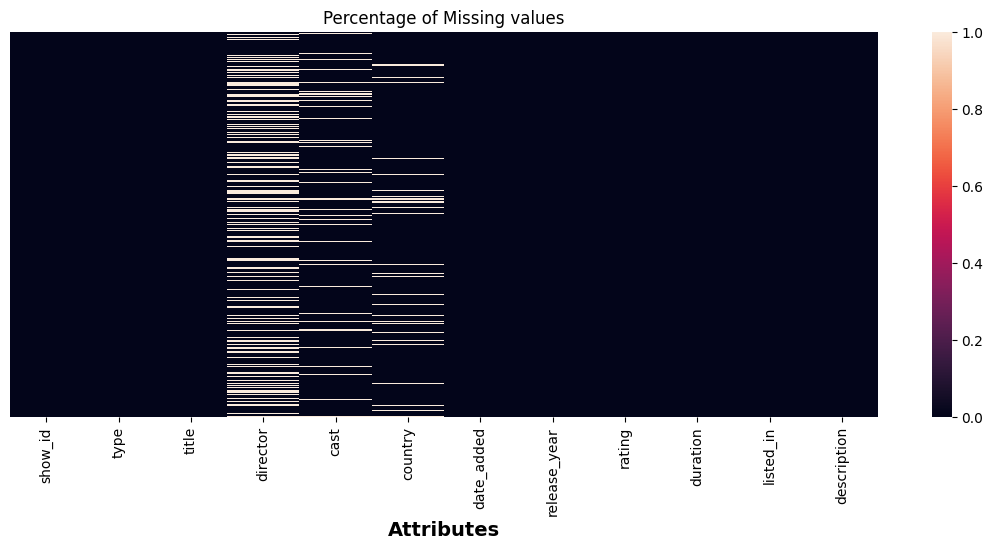

In [168]:
# Visualizing the missing values
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Attributes", size=14, weight="bold")
plt.title("Percentage of Missing values")
plt.show()

<Axes: >

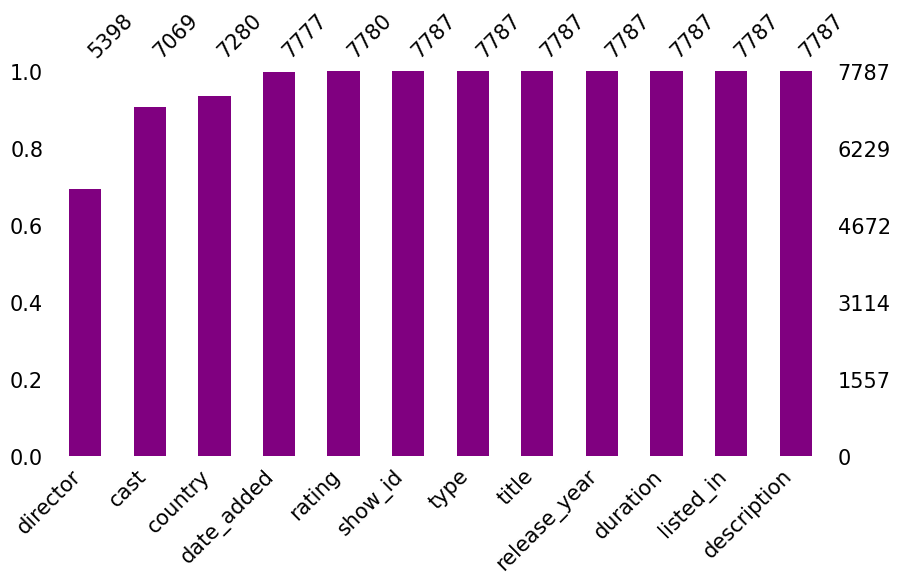

In [169]:
import missingno as msno
msno.bar(df, color='purple',sort='ascending', figsize=(10,5), fontsize=15)

In [170]:
# total number of null values in dataset
df.isnull().sum().sum()

3631

### What did you know about your dataset?

This dataset contains information about various TV shows of netflix about their director ,cast ,type ,release year ,duration and description.This dataset has 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [171]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [172]:
# Dataset Describe
df.describe(include = 'O').T

count unique                                                top  \
show_id      7787   7787                                                 s1   
type         7787      2                                              Movie   
title        7787   7787                                                 3%   
director     5398   4049                             Raúl Campos, Jan Suter   
cast         7069   6831                                 David Attenborough   
country      7280    681                                      United States   
date_added   7777   1565                                    January 1, 2020   
rating       7780     14                                              TV-MA   
duration     7787    216                                           1 Season   
listed_in    7787    492                                      Documentaries   
description  7787   7769  Multiple women report their husbands as missin...   

             freq  
show_id         1  
type         5377  
title           1  
director       18  
cast           18  
country      2555  
date_added    118  
rating       2863  
duration     1608  
listed_in     334  
description     3

### Variables Description

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genere

**description**: The Summary description

### Check Unique Values for each variable.

In [173]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [174]:
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique())

No. of unique values in  show_id is 7787
No. of unique values in  type is 2
No. of unique values in  title is 7787
No. of unique values in  director is 4049
No. of unique values in  cast is 6831
No. of unique values in  country is 681
No. of unique values in  date_added is 1565
No. of unique values in  release_year is 73
No. of unique values in  rating is 14
No. of unique values in  duration is 216
No. of unique values in  listed_in is 492
No. of unique values in  description is 7769


In [175]:
print(df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [176]:

# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # Compute day.
df['year_added'] = df['date_added'].dt.year          # Compute year.
df['month_added'] = df['date_added'].dt.month        # Compute month.

In [177]:
import datetime as dt

In [178]:
def date(row):
    a = row['date_added']
    if 'unknown' not in a:
        month = a.split()[0]
        year = a.split()[-1]
        day = a.split()[1].split(',')[0]
        a = dt.datetime.strptime(f'{month[:3]} {day} {year}', '%b %d %Y')
        return a
    else:
        return np.nan
    df['date_added'] = df.apply(lambda x: date(x), axis=1)

In [179]:
a = df.copy()

In [180]:
a['listed_in'] = a.listed_in.apply(lambda row : row.split(','))
a.explode('listed_in')['listed_in'].unique

<bound method Series.unique of 0       International TV Shows
0                    TV Dramas
0          TV Sci-Fi & Fantasy
1                       Dramas
1         International Movies
                 ...          
7784          Music & Musicals
7785    International TV Shows
7785                Reality TV
7786             Documentaries
7786          Music & Musicals
Name: listed_in, Length: 17071, dtype: object>

In [181]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance',
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality',
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family',
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy',
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [182]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []

  for  word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))


df['Genres'] = a.apply(lambda row: genre_replace(row),axis=1)
df['Genres'] = df['Genres'].apply(lambda row: row.split(', '))

Streaming output truncated to the last 5000 lines.
 TV Dramas not present in dictionary
 Docuseries not present in dictionary
 Science & Nature TV not present in dictionary
 International Movies not present in dictionary
 Independent Movies not present in dictionary
 Thrillers not present in dictionary
 International Movies not present in dictionary
 International Movies not present in dictionary
 Faith & Spirituality not present in dictionary
 Dramas not present in dictionary
 Dramas not present in dictionary
 International Movies not present in dictionary
 Music & Musicals not present in dictionary
 Thrillers not present in dictionary
 International Movies not present in dictionary
 Thrillers not present in dictionary
 TV Comedies not present in dictionary
 TV Dramas not present in dictionary
 International Movies not present in dictionary
 Sports Movies not present in dictionary
 TV Comedies not present in dictionary
 Dramas not present in dictionary
 International Movies not presen

In [183]:
(df.explode('Genres')['Genres'].unique())

array(['', 'Drama', 'Horror', 'ActionAdventure', 'Crime', 'Documentary',
       'Comedy', 'Sports', 'Anime', 'Reality', 'SciFiFantasy', 'Kids',
       'Family', 'Classic', 'Thriller', 'TalkShow', 'Music', 'Cult',
       'Romance', 'LGBTQ'], dtype=object)

In [184]:
df['Genres']

0                      []
1                 [Drama]
2                [Horror]
3       [ActionAdventure]
4                 [Drama]
              ...        
7782              [Drama]
7783              [Drama]
7784        [Documentary]
7785                   []
7786        [Documentary]
Name: Genres, Length: 7787, dtype: object

### What all manipulations have you done and insights you found?

We can gather the following insights from the dataset:

Director: There are missing values in the "Director" column.

Country: There are missing values in the "Country" column, which have been filled with zero.

Cast: There are missing values in the "Cast" column, which have been filled with "NAN."

Date Added: There are missing values in the "Date Added" column.

Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in each column has to find unique items from different columns.

Date_addded Column: In the "Date Added" column, additional information has been extracted such as the day, month, and year.

In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero. Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
**Histogram plot of release dates of shows/movies on Netflix**

<Figure size 1000x800 with 0 Axes>

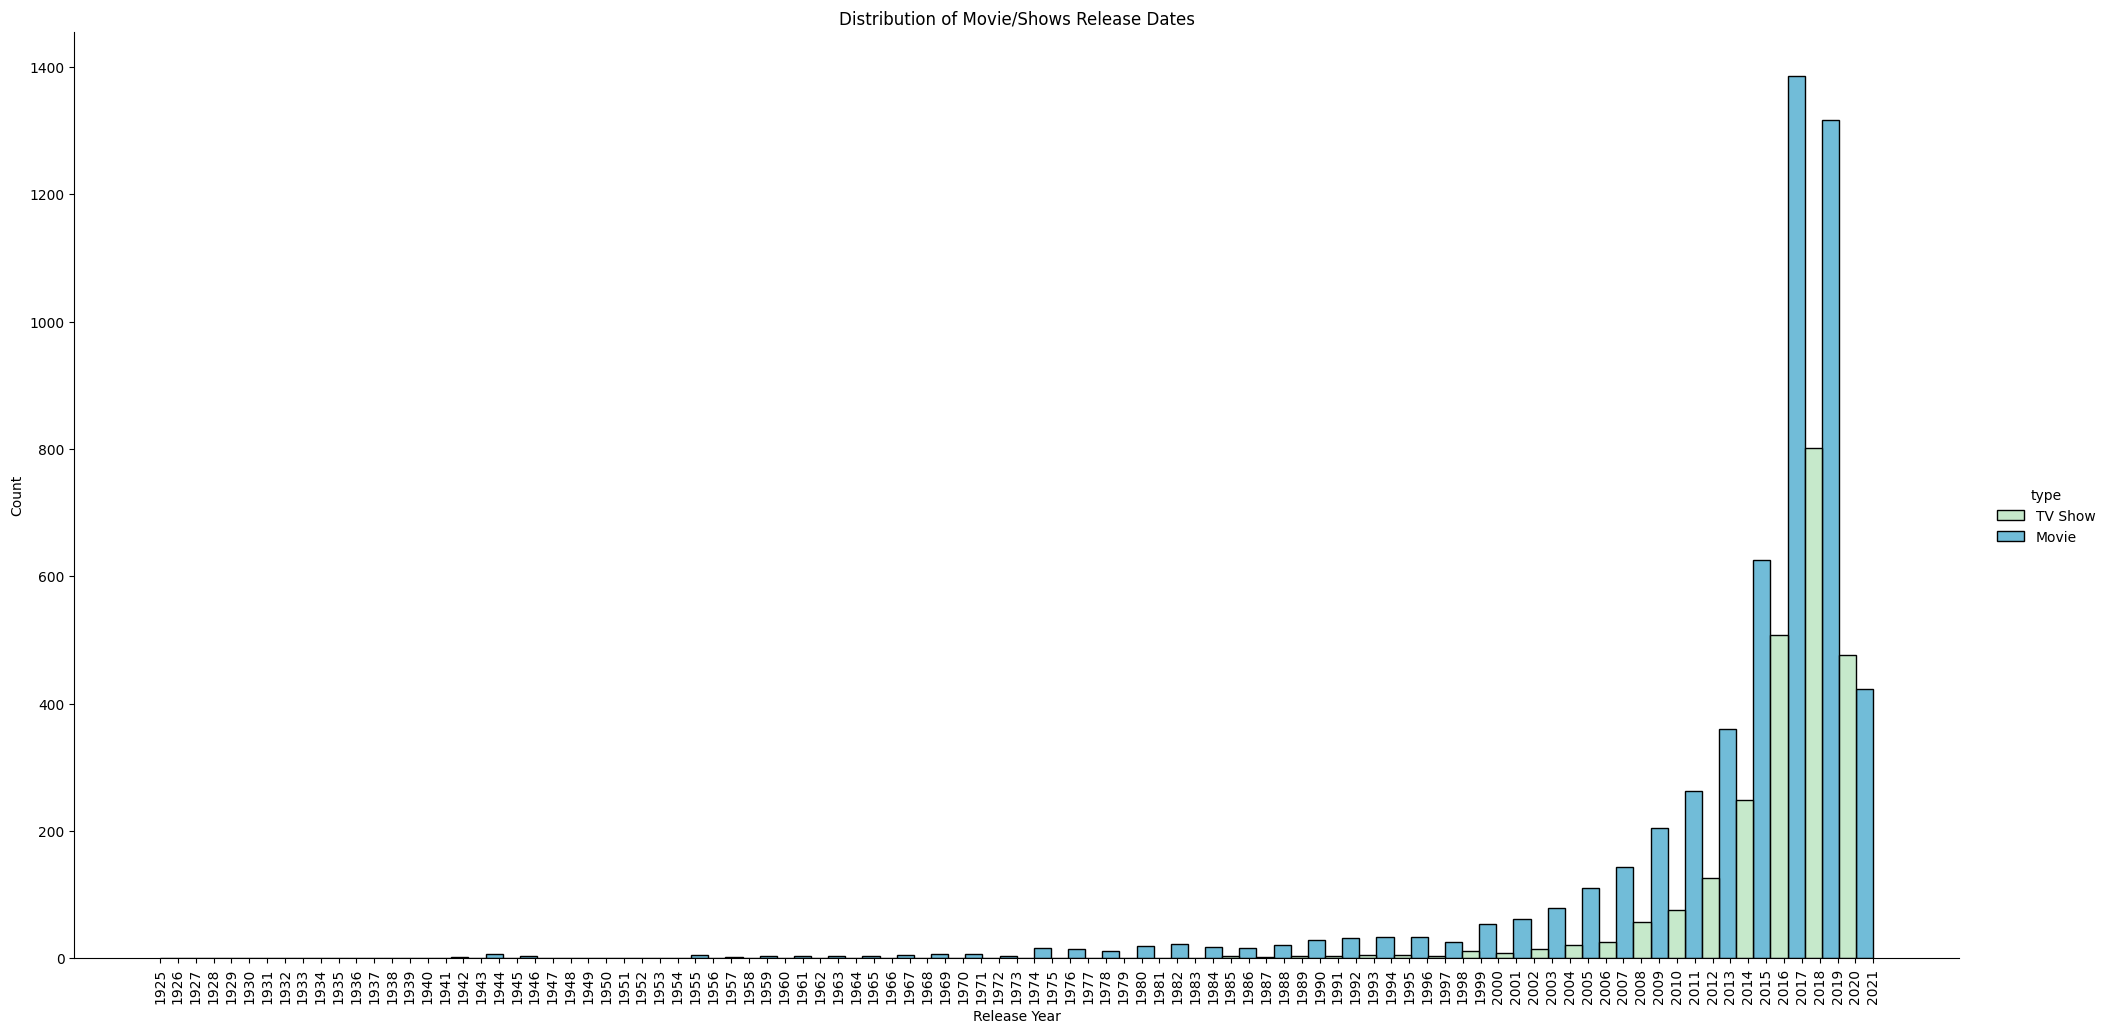

In [185]:
# Chart - 1 visualization code
a = plt.figure(figsize=(10,8))
a = sns.displot(x='release_year', hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(df.release_year.min(),df.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')

##### 1. Why did you pick the specific chart?

**The distplot is plotted using the distplot() function. The scatterplot displays the data distribution of a single variable in relation to the density distribution. The marine-born. The distplot() function returns the plot with the density distribution after accepting the data variable as an argument.**

##### 2. What is/are the insight(s) found from the chart?

####**OBSERVATIONS**
> * **Most Movies streaming on the platform were released after 2010**
> * **Most  TV Shows streaming on the platform were released after 2015**
> * **The year 2017 had highest number of Movie and TV show releases on the platform**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 2
**Histogram plot of dates of number of shows/movies added by the Streaming giant**

<Figure size 1000x800 with 0 Axes>

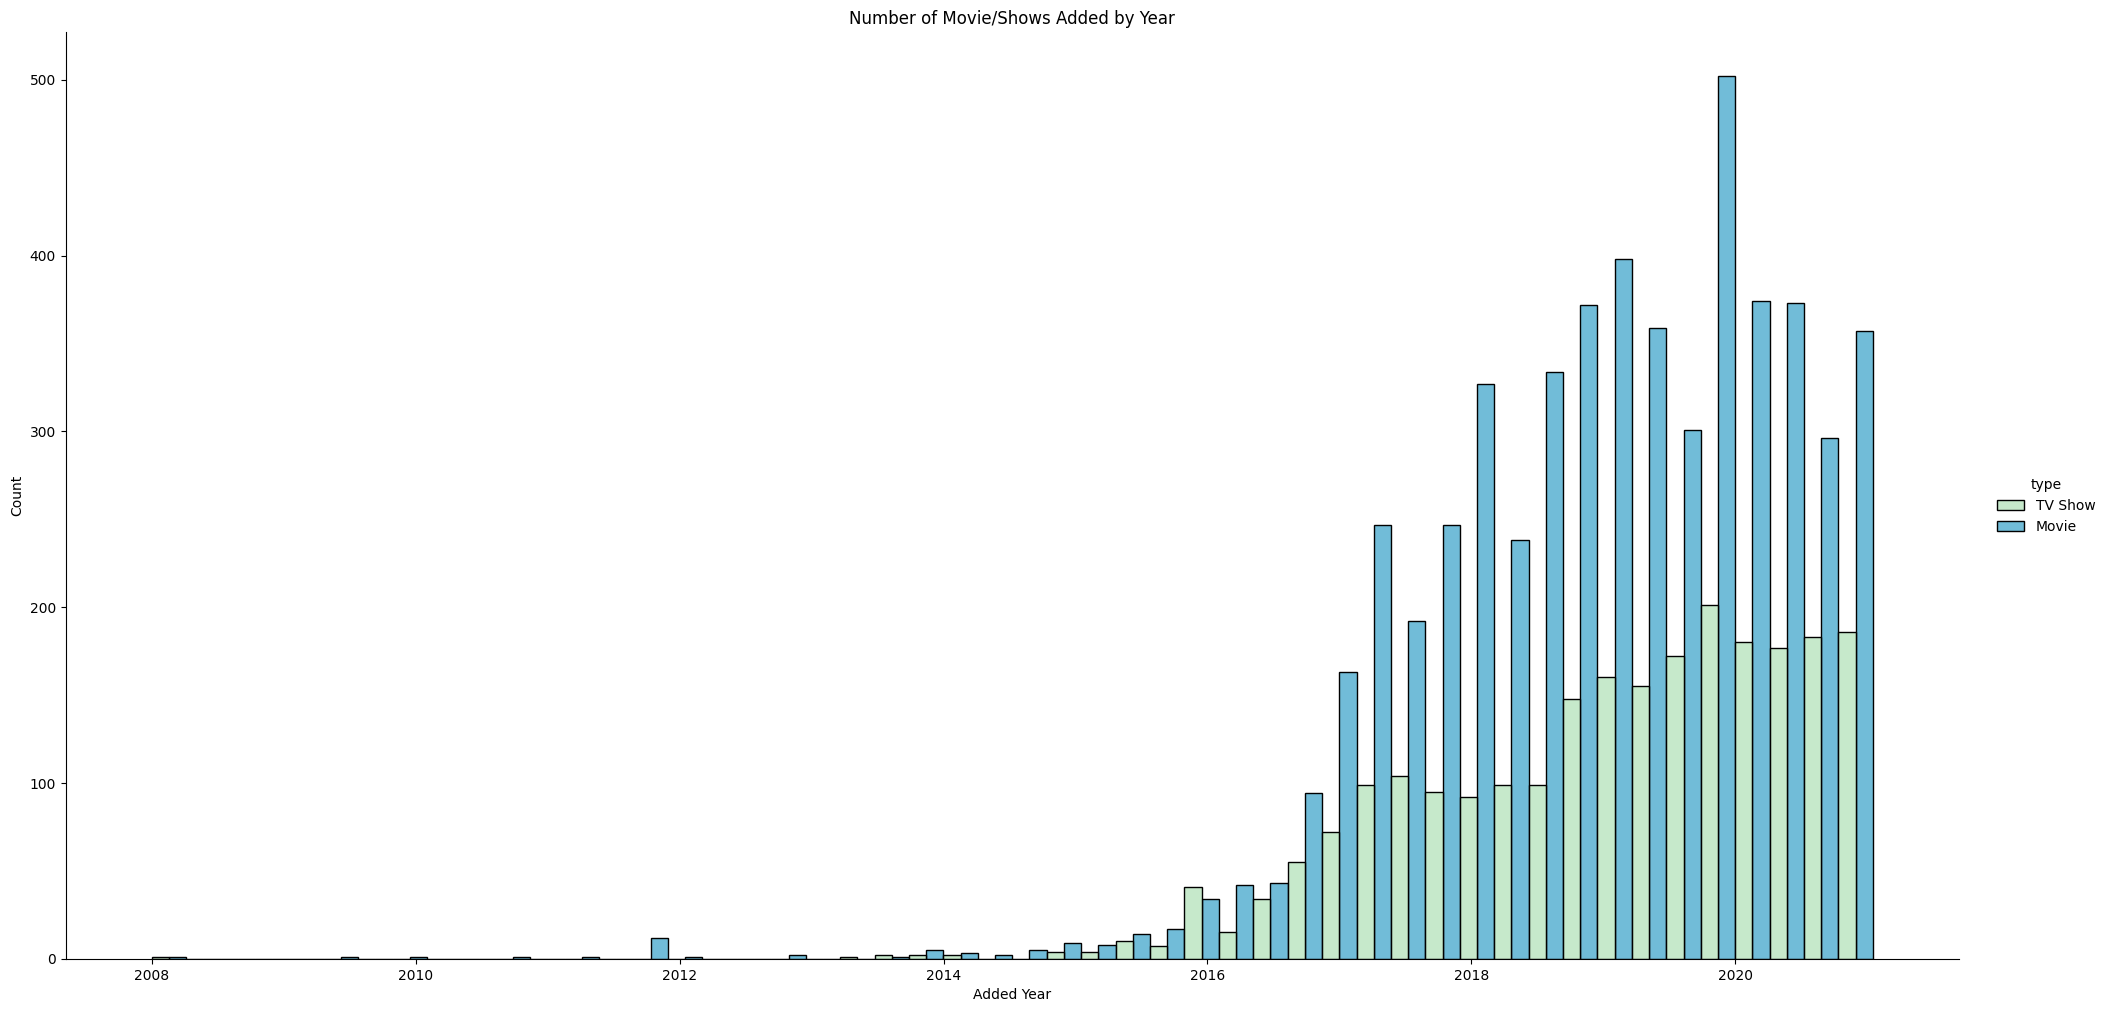

In [186]:
# Chart - 2 visualization code
a = plt.figure(figsize=(10,8))
a = sns.displot(x= df['date_added'], hue = 'type', data = df, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.title('Number of Movie/Shows Added by Year')
a = plt.xlabel('Added Year')


##### 1. Why did you pick the specific chart?

**The distplot is plotted using the distplot() function. The scatterplot displays the data distribution of a single variable in relation to the density distribution. The marine-born. The distplot() function returns the plot with the density distribution after accepting the data variable as an argument.**

##### 2. What is/are the insight(s) found from the chart?

####**OBSERVATIONS**
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**NO negative growth is promoted.**

#### Chart - 3

In [187]:
# Chart - 3 visualization code
labels = ['TV Show', 'Movie']
values = [df.type.value_counts()[1], df.type.value_counts()[0]]

# Colors
colors = ['#ffd700', '#008000']

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])

# Customize layout
fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[dict(text='Type of Content', font_size=20, showarrow=False)]
)

# Set colors
fig.update_traces(marker=dict(colors=colors))

##### 1. Why did you pick the specific chart?

**I have  picked pie chart because this chart is very effective in visualizing the distribution of categorical data.**

##### 2. What is/are the insight(s) found from the chart?

**TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes it will provide the positive insight to the show bizz business.**

#### Chart - 4
**Type of Videos on Netflix**

In [188]:
# Chart - 4 visualization code
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

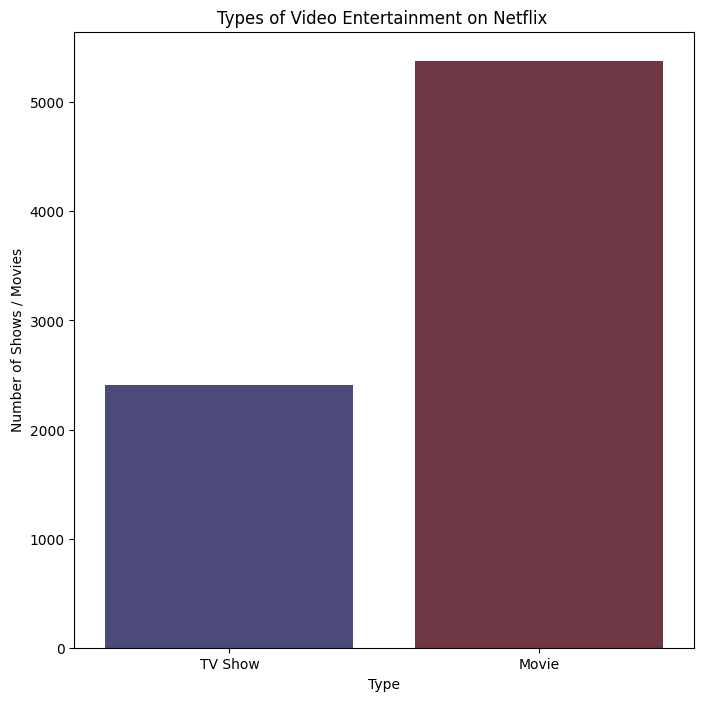

In [189]:
a = plt.figure(figsize=(8,8))
a = sns.countplot(x= df['type'], data = df,palette='icefire')
a = plt.title('Types of Video Entertainment on Netflix ')
a = plt.xlabel('Type')
a = plt.ylabel('Number of Shows / Movies')

##### 1. Why did you pick the specific chart?

**Countplot() method is used to Show the counts of observations in each categorical bin using bars.**

##### 2. What is/are the insight(s) found from the chart?

 * **There are almost twice as many movies as TV shows on Netflix.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 5
**Different Ratings On The  Platform**

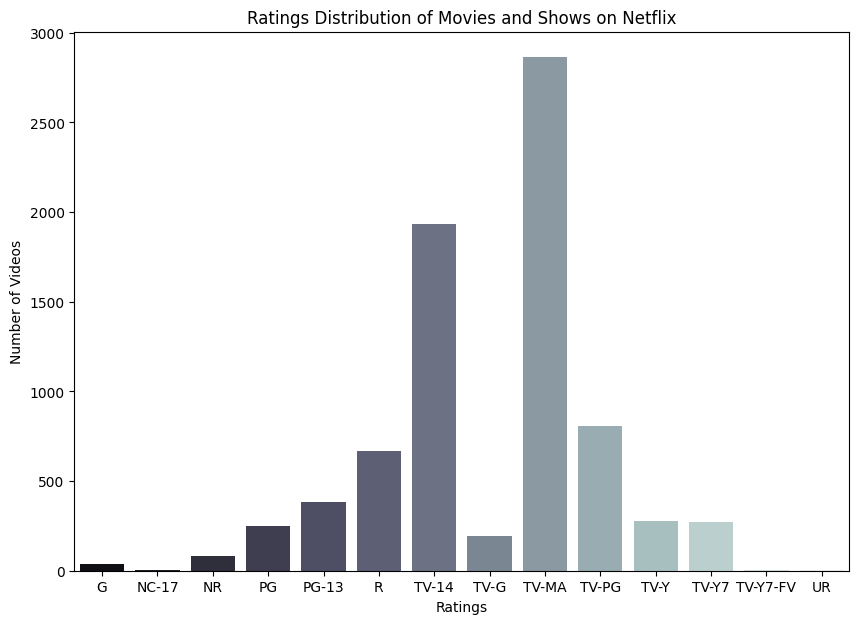

In [190]:
# Chart - 5 visualization code
a = plt.figure(figsize=(10,7))
d = df.groupby('rating').agg({'show_id':'count'}).reset_index()
a = sns.barplot(x = d['rating'] ,y = d['show_id'], palette= 'bone')
a = plt.title('Ratings Distribution of Movies and Shows on Netflix')
a = plt.xlabel('Ratings')
a = plt.ylabel('Number of Videos')

##### 1. Why did you pick the specific chart?

**Bar plots are a type of data visualization used to represent data in the form of rectangular bars. The height of each bar represents the value of a data point, and the width of each bar represents the category of the data.**

##### 2. What is/are the insight(s) found from the chart?

**Most content on Netflix is rated for Mature Audiences and over 14 years old.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart -  
**Content added over the year**

In [191]:
# Chart - 6 visualization code
import plotly.graph_objects as go
import pandas as pd
tv_show = df[df["type"] == "TV Show"]
movie = df[df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

trace1 = go.Scatter(x=content_1.index, y=content_1.values, name="TV Shows", marker=dict(color='#008000', line=dict(width=4)))
trace2 = go.Scatter(x=content_2.index, y=content_2.values, name="Movies", marker=dict(color='#ffd700', line=dict(width=4)))

fig = go.Figure(data=[trace1, trace2], layout=go.Layout(title="Content added over the years",title_x=0.5, legend=dict(x=0.8, y=1.1, orientation="h")))
# Display chart
fig.show()

##### 1. Why did you pick the specific chart?

**Line When working on machine learning or data science projects, plot is one of the simplest and most fundamental graphical analysis tools that is crucial for data analysis. They are employed to convey a correlation between two variables.**

##### 2. What is/are the insight(s) found from the chart?

**The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No

#### Chart - 7
**TOP GENRE ON NETFLIX**

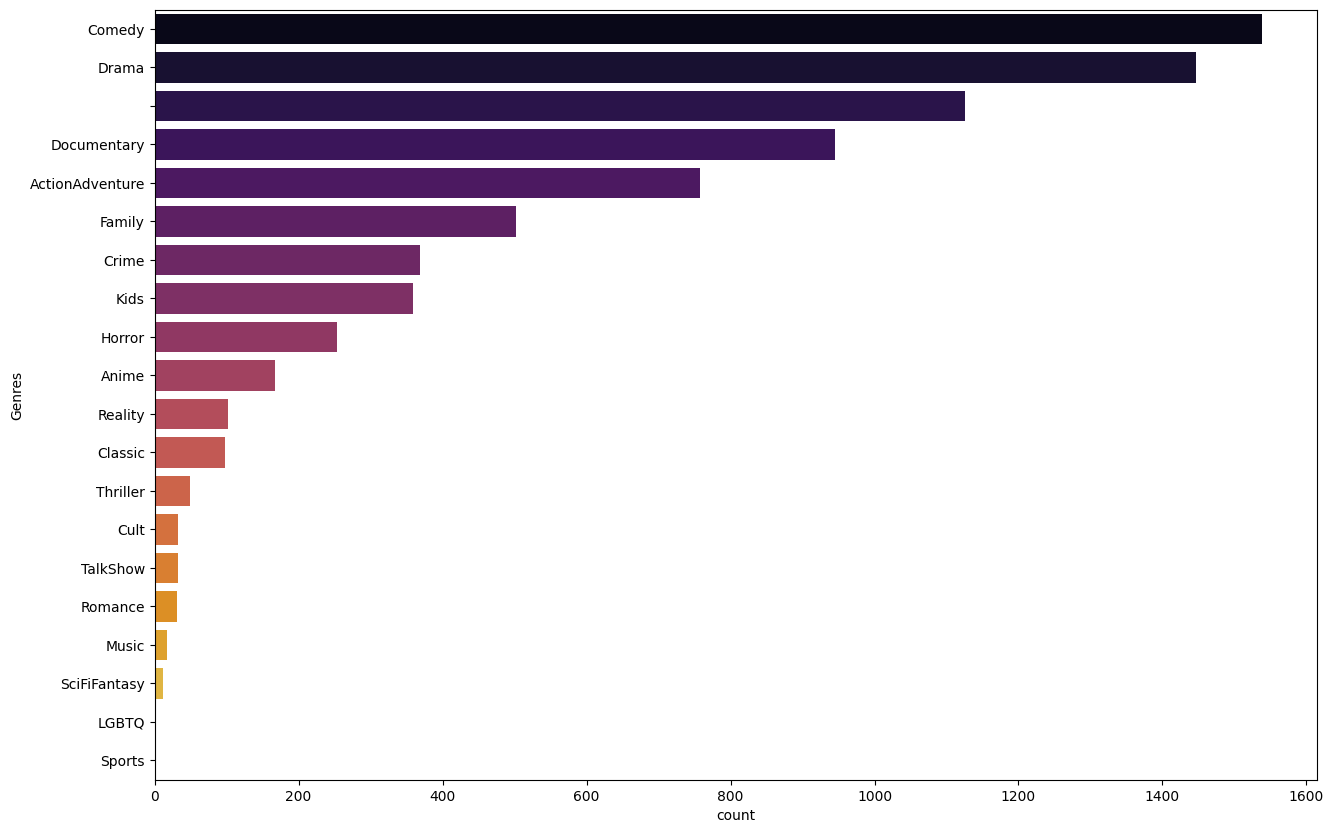

In [192]:
# Chart - 7 visualization code
a = df.loc[:,['show_id','title','country', 'Genres']].copy()
a = a.explode('Genres')
genre_list = a.Genres.unique()
group = a.groupby('Genres').agg(count = ('show_id','count')).sort_values('count', ascending= False).reset_index()
plt.figure(figsize=(15,10))
_ = sns.barplot(y = 'Genres', x = 'count',data = group , palette='inferno')


In [193]:
top10genres = group.head(10)['Genres'].to_list()

##### 1. Why did you pick the specific chart?

**The bar plots can be plotted horizontally or vertically. A bar chart describes the comparisons between the discrete categories.**

##### 2. What is/are the insight(s) found from the chart?

####**OBSERVATIONS**
---
> **Top Genres in Netflix are:**
1. **Drama**
2.**Comedy**
3.**Documentary**
4.**Action and Adventure**
5.**Romance**

---


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**NO**

#### Chart - 8
**DURATION OF MOVIES ON NETFLIX**

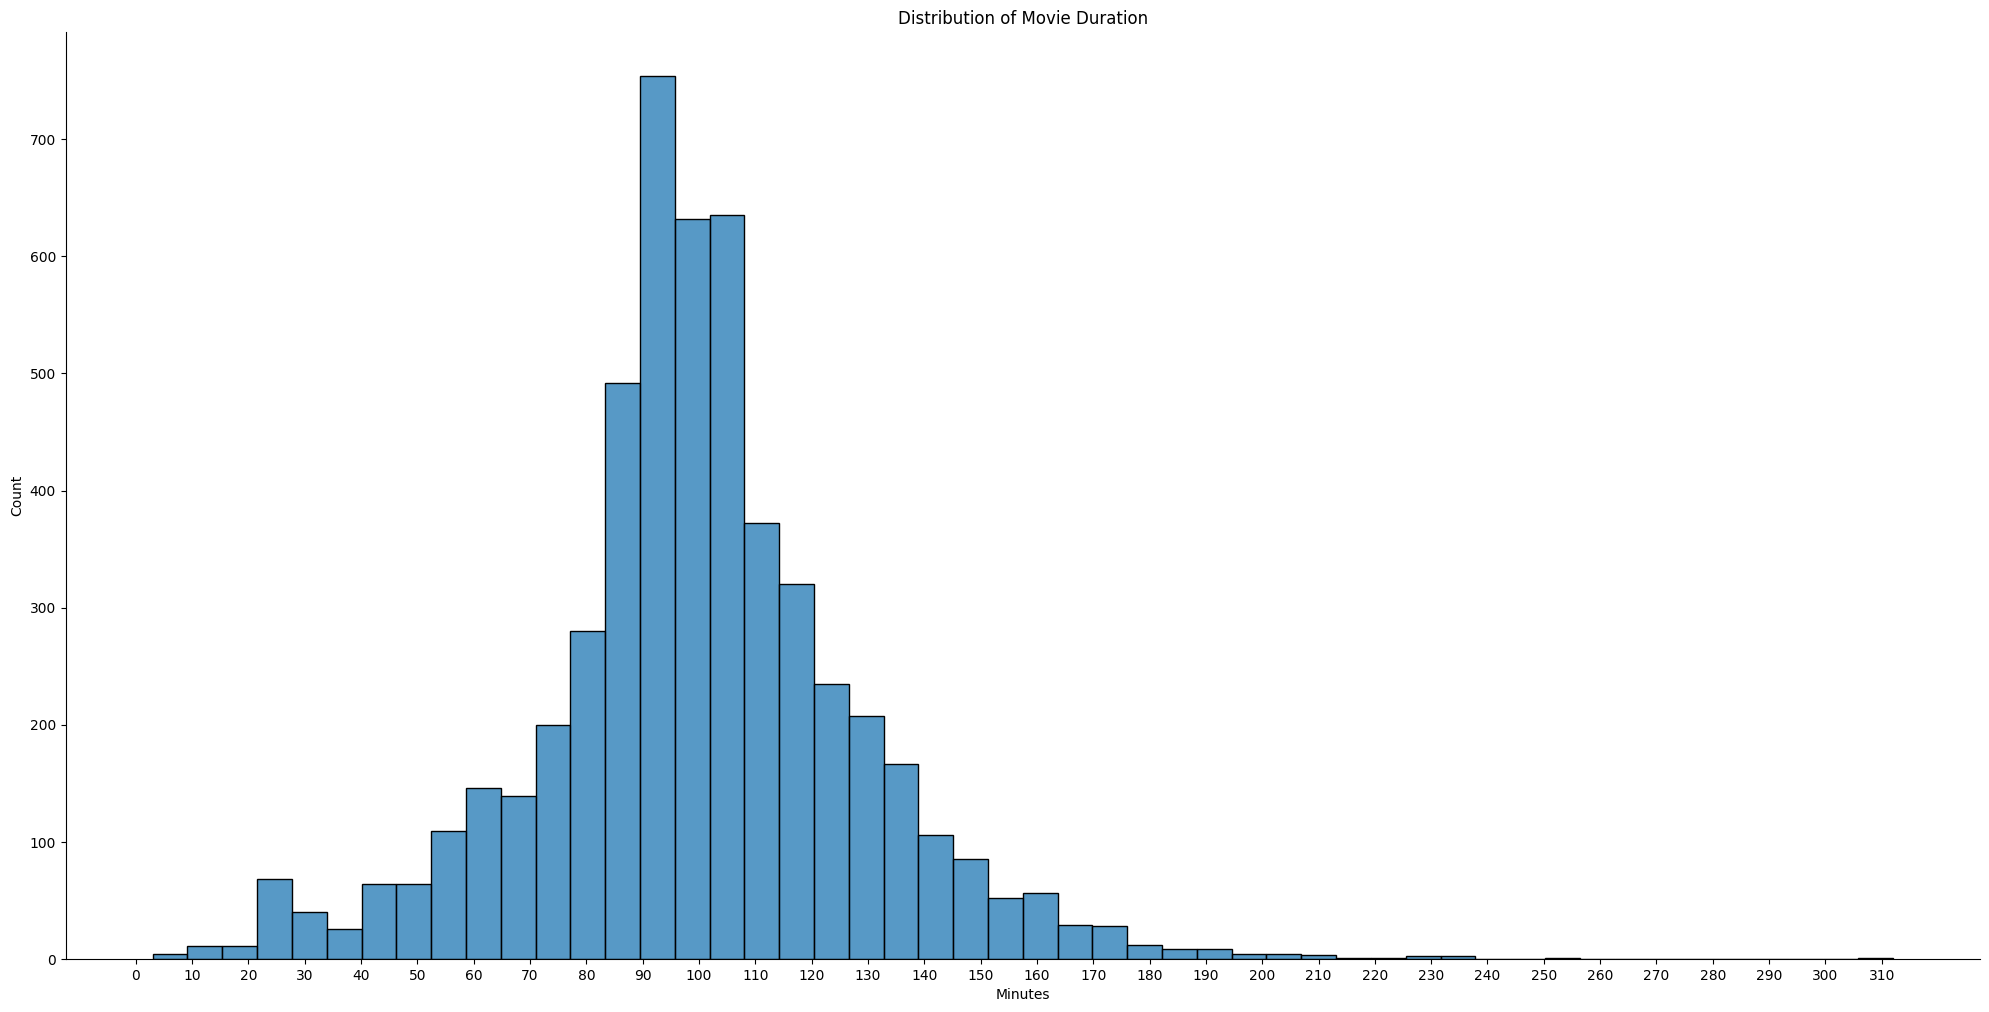

In [194]:
# Chart - 8 visualization code
a=df[df['type']=='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Duration' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Duration',  data = country_list, kind = 'hist', height=10, aspect=2, bins = 50)
a = plt.title('Distribution of Movie Duration')
a = plt.xlabel('Minutes')
a = plt.xticks(ticks = np.arange(0,country_list.Duration.max()+1,10))


##### 1. Why did you pick the specific chart?

**A Distplot or distribution plot, depicts the variation in the data distribution.**

##### 2. What is/are the insight(s) found from the chart?

**Most movies on Netflix have a duration range from 90 to 110 minutes.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

NO

#### Chart - 9
**FREQUENT CAST ON NETFLIX**

In [195]:
# Chart - 9 visualization code
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [196]:
# seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [197]:
cast = cast[cast != 'NO cast']

In [198]:
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

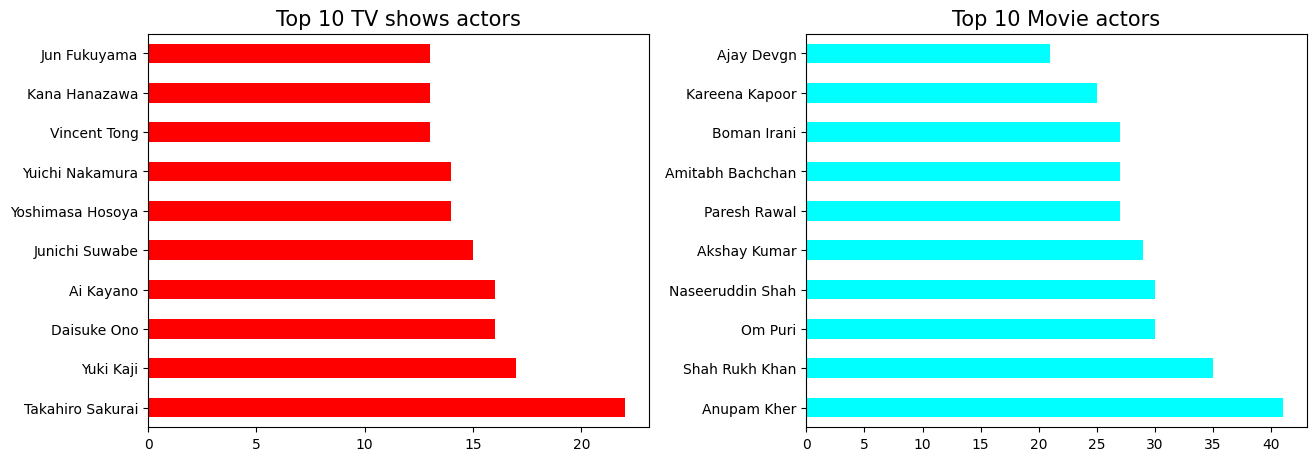

In [199]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'No cast']
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'No cast']
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='Cyan')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?

**The bars' horizontal arrangement makes it simpler to read and compare the values. Each bar's length indicates how many films or TV series each actor has appeared in. In addition to titles, the chart has two subplots that are clearly labelled as representing TV shows and films, respectively.**

##### 2. What is/are the insight(s) found from the chart?

**Takahiro Sakurai is the actor with the most appearances in the TV programmes category. Anupam Kher is the actor with the highest appearance in the category of films.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 10 ### **TOP 10 GENRE OF NETFLIX**

In [200]:
# Chart - 10 visualization code
top_10_Genre = df['listed_in'].value_counts().head(10)

fig2 = px.pie(top_10_Genre, values=top_10_Genre.values, names=top_10_Genre.index)

custom_colors = ['#4c78a8', '#72b7b2', '#ff7f0e', '#2ca02c', '#d62728']
fig2.update_traces(hovertemplate=None, textposition='outside', textinfo='percent+label', rotation=0,
                   marker=dict(colors=custom_colors))

fig2.update_layout(height=600, width=900, title='Top 10 genres on Netflix',
                   margin=dict(t=100, b=30, l=0, r=0),
                   showlegend=False,
                   plot_bgcolor='#fafafa',
                   paper_bgcolor='#fafafa',
                   title_font=dict(size=20, color='#555', family="Lato, sans-serif"),
                   font=dict(size=12, color='#FF0000'),
                   hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))

fig2.show()

##### 1. Why did you pick the specific chart?

**By comparing the relative areas of the slices, readers can rapidly compare the sizes of various genres thanks to the pie chart's circular form. The additional information and improved readability of the chart are provided by the supplementary labels and percentage values outside the slices.**

##### 2. What is/are the insight(s) found from the chart?

In this chart, the top three genres on Netflix based on their distribution are:

1-**Documentaries:** 14.4%

2-**Stand-up Comedy:** 13.9%

3-**Drama, International Movies:**1 3.8%

These genres have the highest percentages compared to the other genres included in the top 10 list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 11 ### **Duration of Tv shows on Netflix**

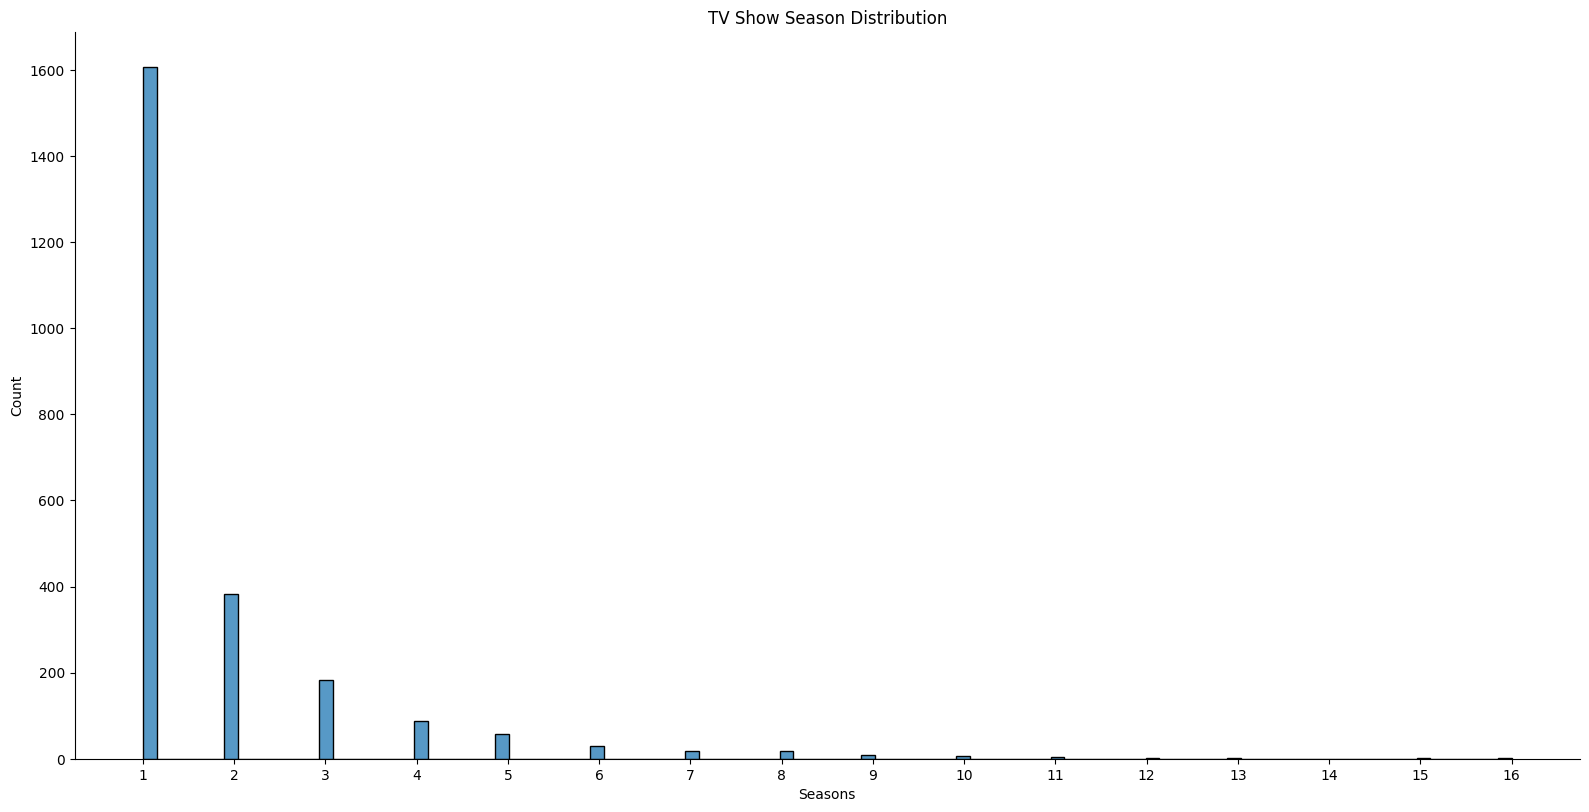

In [201]:
a=df[df['type']!='Movie'].loc[:,['show_id','duration']].copy()
cast = (a['duration'].to_list())

newlist = []
for genre in cast:
  newlist.append(int(genre.split(' ')[0]))
country_list = pd.DataFrame({'Seasons' : newlist, 'id':np.arange(0,len(newlist),1)})
a = sns.displot(x= 'Seasons',  data = country_list, kind = 'hist', height=8, aspect=2)
a = plt.title('TV Show Season Distribution')
a = plt.xlabel('Seasons')
a = plt.xticks(ticks = np.arange(country_list.Seasons.min(),country_list.Seasons.max()+1,1))

##### 1. Why did you pick the specific chart?

**I have used BAR GRAPH for better graphical representation of the data .**

##### 2. What is/are the insight(s) found from the chart?

####**OBSERVATIONS**
> * **Most TV shows on Netflix have a span of 1 season only**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 12     **Has Netflix Been Focusing Increasingly on TV Shows as compared to movies**

In [202]:
# Chart - 12 visualization code
content = df.loc[:,['title','date_added','release_year', 'duration', 'type']].dropna().copy()

In [203]:
content['date_added'] = content['date_added'].dt.year

In [204]:
#Assuming TV shows release new seasons every year, we'll be adding a duplicate of the show for each season.
def season(row):
  release = row['release_year']
  added = row['date_added']

  if row['type'] =='TV Show':
    seasons = int(row['duration'][0])
    b = []
    for i in range(1, seasons+1):
      if i ==1:
        b.append(release)
      else:
        b.append(b[-1]-1)
    a = b
  else:
    a = []
    a.append(row['release_year'])

  return a

content['Released Years'] = content.apply(lambda x: season(x),axis=1)

In [205]:
compare = content.explode('Released Years')

In [206]:
tv = compare[compare['type'] == 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
tv['type'] = 'TV'
movie = compare[compare['type'] != 'TV Show'].groupby(['date_added']).agg(count = ('title','count')).reset_index()
movie['type'] = 'Movie'

In [207]:
data = pd.concat([tv, movie], axis = 0)

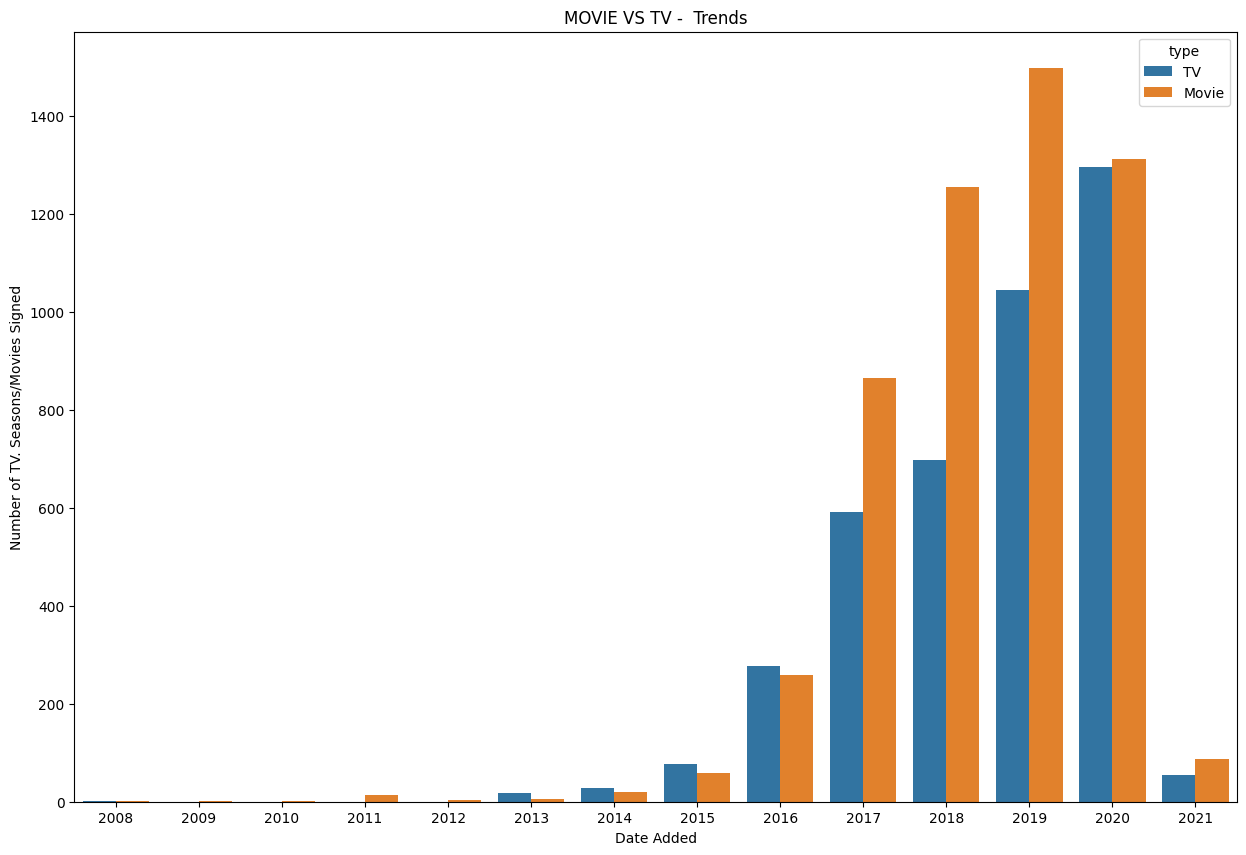

In [208]:
plt.figure(figsize = (15,10))
sns.barplot(x = 'date_added', y='count', hue = 'type', data = data)
plt.title('MOVIE VS TV -  Trends')
plt.xlabel('Date Added')
_ = plt.ylabel('Number of TV. Seasons/Movies Signed')

##### 1. Why did you pick the specific chart?

**Bar plots are a type of data visualization used to represent data in the form of rectangular bars. The height of each bar represents the value of a data point, and the width of each bar represents the category of the data.**

##### 2. What is/are the insight(s) found from the chart?

####**OBSERVATIONS**
---
> * **The above graph depicts seasons of TV shows signed vs the movies signed**
> * **This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier**
> * **We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year**
---

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No**

#### Chart - 13

In [209]:
# Chart - 13 visualization code
country_count=df['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

country
United States      2555
India               923
United Kingdom      397
Japan               226
South Korea         183
Canada              177
Spain               134
France              115
Egypt               101
Turkey              100
Mexico              100

In [210]:
data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()

##### 1. Why did you pick the specific chart?

**Funnel charts are frequently used to illustrate how data is gradually reduced as it progresses through several stages or categories. In this instance, the graph shows the number of films in the top 10 nations, highlighting the decreasing amount from top to bottom.**

##### 2. What is/are the insight(s) found from the chart?

**The United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies, demonstrating a significant presence in the global Movies/Tv shows market.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the learned lessons can aid in a variety of ways to improve the business:

1. **Talent Acquisition**: This information might be helpful for companies trying to hire qualified people for technical or creative roles in the film, writing, acting, or other industries.


2. **Market Expansion**:The findings point to nations like India and the United States that produce a lot of films. This knowledge can help companies grow their operations and focus on certain markets for collaborations, distribution, and marketing.

#### Chart - 14 - Correlation Heatmap

In [211]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)




In [212]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.501959  
Kids            0.027322  0.022388        0.093199       0.073276  
Older Kids      0.120219  0.044776        0.204030       0.187696  
Teens           0.382514  0.097015        0.188917       0.237069

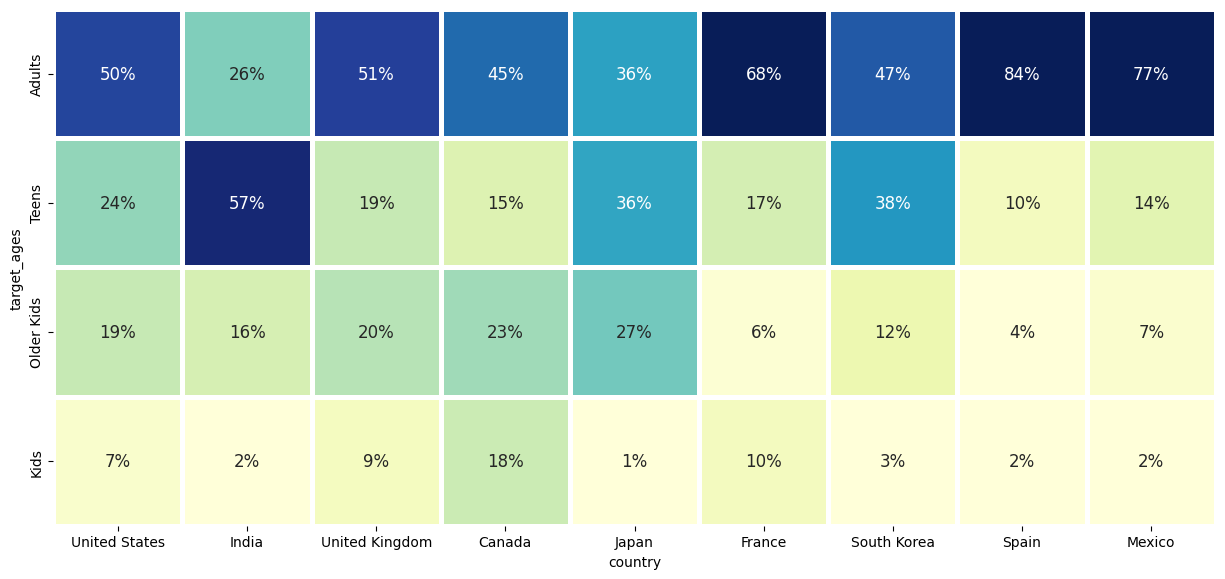

In [213]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()




##### 1. Why did you pick the specific chart?

**The statistical investigation of the link or dependence between two variables is called correlation. We can examine the direction and degree of the association between two sets of values using correlation.**

##### 2. What is/are the insight(s) found from the chart?

**In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:**

**Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.**

**1.France- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.**

**2.India- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.**

**3.United Kingdom -It has a relatively high level of interest among adults, with 51% expressing interest.**

**4.Mexico-Here ,also demonstrates a substantial level of interest, with 77% of adults showing interest in the subject.**

**5.South Korea , United States- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.**

**6.Japan- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.**

**7.Canada- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.**

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, India, and Mexico have higher levels of interest in the adults, while Canada has relatively lower interest compared to the other countries**

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothesis in Statistics**

Hypothesis is an assumption about a parameter in population.

**Null Hypothesis**

It assumes that the observation is not statistically significant.

**Alternate Hypothesis**

It assumes that the observations are due to some reason.

It's alternate to Null Hypothesis.

**Example:**

For an assessment of a student we would take:

"student is worse than average" - as a null hypothesis, and:

"student is better than average" - as an alternate hypothesis

**STATEMENT 1**

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

**STATEMENT 2**

H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

### Hypothetical Statement - 1

In [214]:
#making copy of df_neat_frame
netflix_hypothesis=df.copy()
#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added             Genres target_ages  count  
0          8.0                 []      Adults      1  
1         12.0            [Drama]      Adults      1  
2         12.0           [Horror]      Adults      1  
3         11.0  [ActionAdventure]       Teens      1  
4          1.0            [Drama]       Teens      1

In [215]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [216]:
#with respect to each ratings assigning it into group of categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', nan], dtype=object)

In [217]:
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)  # Convert to string type
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(4)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added             Genres target_ages  count  
1         12.0            [Drama]      Adults      1  
2         12.0           [Horror]      Adults      1  
3         11.0  [ActionAdventure]       Teens      1  
4          1.0            [Drama]       Teens      1

In [218]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.275145

In [219]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [220]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


In [221]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [222]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

#### 2. Perform an appropriate statistical test.

In [223]:
# Perform Statistical Test to obtain P-Value
stats.t.ppf(0.025,dof)



-1.9620900365868952

In [224]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### Which statistical test have you done to obtain P-Value?

I have done t-test .

##### Why did you choose the specific statistical test?

**Parametric tests called T-tests are used to find correlations between two samples of data. Data distribution for T-tests must follow the following guidelines regarding population parameters that are unknown: Since data values are continuous and independent, their measurement scale should also be continuous.**

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


H1:The duration which is more than 90 mins are movies

HO:The duration which is more than 90 mins are NOT movies

#### 2. Perform an appropriate statistical test.

In [225]:

#making copy of df_clean_frame
netflix_hypothesis=df.copy()
#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added             Genres target_ages  count  
0          8.0                 []      Adults      1  
1         12.0            [Drama]      Adults      1  
2         12.0           [Horror]      Adults      1  
3         11.0  [ActionAdventure]       Teens      1  
4          1.0            [Drama]       Teens      1

In [226]:
netflix_hypothesis['duration']= netflix_hypothesis['duration'].str.extract('(\d+)')
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [227]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])
#from duration feature extractin string part and after extracting Changing the object type to numeric
#df_hypothesis['duration']= df_hypothesis['duration'].str.extract('(\d+)')
#df_hypothesis['duration'] = pd.to_numeric(df_hypothesis['duration'])
#head of df_
netflix_hypothesis.head(4)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   

   month_added             Genres target_ages  count  
0          8.0                 []      Adults      1  
1         12.0            [Drama]      Adults      1  
2         12.0           [Horror]      Adults      1  
3         11.0  [ActionAdventure]       Teens      1

In [228]:
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

In [229]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')
#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

type   duration
0    Movie  99.307978
1  TV Show   1.775934

In [230]:
#In A and B variable grouping values
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.596359
dtype: float64


In [231]:
#import stats
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2410
dof 7785
SP_2 = duration    253.64841
dtype: float64
SP duration    15.926343
dtype: float64
tvalue 249.81856492927665


In [232]:
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602687544602204

In [233]:
#t-distribution
stats.t.ppf(0.975,dof)

1.96026875446022

##### Which statistical test have you done to obtain P-Value?

I have done t-test.

##### Why did you choose the specific statistical test?

**Parametric tests called T-tests are used to find correlations between two samples of data. Data distribution for T-tests must follow the following guidelines regarding population parameters that are unknown: Since data values are continuous and independent, their measurement scale should also be continuous.**

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [234]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
day_added         10
year_added        10
month_added       10
Genres             0
target_ages        7
count              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

* **We have already dealt with the missing values.**

### 2. Handling Outliers

<Axes: >

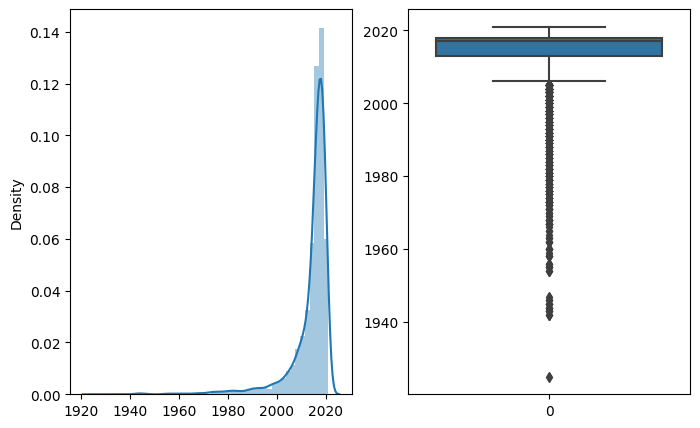

In [235]:
# Handling Outliers & Outlier treatments
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(8,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(df.release_year)

**The figure (release_year less than 2009) are being  displayed as outliers.**

In [236]:
# Replacing otliers with mean value
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


* **we don't have have any release_year which is greater than 2018.**

In [237]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) | ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]


In [238]:
release_year_outliers

show_id     type                 title         director  \
7         s8    Movie                   187   Kevin Reynolds   
44       s45    Movie              Æon Flux     Karyn Kusama   
94       s95    Movie               28 Days     Betty Thomas   
97       s98    Movie           3 Deewarein  Nagesh Kukunoor   
105     s106    Movie   300 Miles to Heaven   Maciej Dejczer   
...      ...      ...                   ...              ...   
7745   s7746    Movie  Yours, Mine and Ours     Raja Gosnell   
7749   s7750  TV Show             Yu-Gi-Oh!              NaN   
7754   s7755    Movie                  Yuva      Mani Ratnam   
7760   s7761    Movie             Zaki Chan       Wael Ihsan   
7782   s7783    Movie                  Zozo      Josef Fares   

                                                   cast  \
7     Samuel L. Jackson, John Heard, Kelly Rowan, Cl...   
44    Charlize Theron, Marton Csokas, Jonny Lee Mill...   
94    Sandra Bullock, Viggo Mortensen, Dominic West,...   
97    Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...   
105   Krzysztof Stroiński, Andrzej Mellin, Adrianna ...   
...                                                 ...   
7745  Dennis Quaid, Rene Russo, Sean Faris, Katija P...   
7749  Dan Green, Eric Stuart, Amy Birnbaum, Darren D...   
7754  Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...   
7760  Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   

                                                country date_added  \
7                                         United States 2019-11-01   
44                                        United States 2018-02-01   
94                                        United States 2020-09-30   
97                                                  NaN 2019-12-31   
105                             Denmark, France, Poland 2019-10-01   
...                                                 ...        ...   
7745                                      United States 2019-11-20   
7749                                              Japan 2020-07-08   
7754                                              India 2018-03-01   
7760                                              Egypt 2020-05-19   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   

      release_year rating   duration  \
7             1997      R    119 min   
44            2005  PG-13     93 min   
94            2000  PG-13    104 min   
97            2003  TV-MA    121 min   
105           1989  TV-14     93 min   
...            ...    ...        ...   
7745          2005     PG     88 min   
7749          2005  TV-Y7  2 Seasons   
7754          2004  TV-14    160 min   
7760          2005  TV-PG    109 min   
7782          2005  TV-MA     99 min   

                                            listed_in  \
7                                              Dramas   
44               Action & Adventure, Sci-Fi & Fantasy   
94                                   Comedies, Dramas   
97            Dramas, International Movies, Thrillers   
105                      Dramas, International Movies   
...                                               ...   
7745               Children & Family Movies, Comedies   
7749                           Anime Series, Kids' TV   
7754                     Dramas, International Movies   
7760  Comedies, International Movies, Romantic Movies   
7782                     Dramas, International Movies   

                                            description  day_added  \
7     After one of his high school students attacks ...        1.0   
44    Aiming to hasten an uprising, the leader of an...        1.0   
94    After her drunken antics result in property da...       30.0   
97    A reporter interviews three convicts on death ...       31.0   
105   Hoping to help their dissident parents, two br...        1.0   
...                                                 ...        ...   
7745  When a father of eight a

In [239]:
#15 percentile value is 2009
df["release_year"] = np.where(df["release_year"] <2009, df.release_year.mean(),df['release_year'])

### **BOX PLOT FOR RELEASE YEAR**

<Axes: >

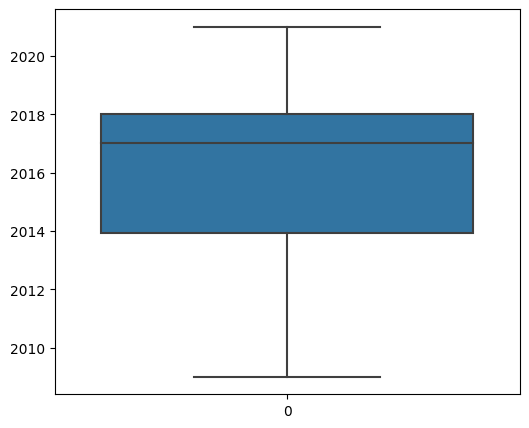

In [240]:
#plot boxplot
plt.figure(figsize=(6,5))
sns.boxplot(df.release_year)

##### What all outlier treatment techniques have you used and why did you use those techniques?

**There are different approaches such as replacing the outlier with the mean value, or median value or in some cases dropping the observation with the suspected outlier so as to avoid any bias in them. We tend to delete the outlier if they are due to data entry errors caused due to human error, data processing errors.**

### 3. Categorical Encoding

In [241]:
# Encode your categorical
X_features = df.columns



In [242]:
X_features

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'year_added', 'month_added', 'Genres', 'target_ages',
       'count'],
      dtype='object')

In [243]:
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [244]:
pd.get_dummies(df['duration'])[0:5]

1 Season  10 Seasons  10 min  100 min  101 min  102 min  103 min  104 min  \
0         0           0       0        0        0        0        0        0   
1         0           0       0        0        0        0        0        0   
2         0           0       0        0        0        0        0        0   
3         0           0       0        0        0        0        0        0   
4         0           0       0        0        0        0        0        0   

   105 min  106 min  ...  90 min  91 min  92 min  93 min  94 min  95 min  \
0        0        0  ...       0       0       0       0       0       0   
1        0        0  ...       0       0       0       1       0       0   
2        0        0  ...       0       0       0       0       0       0   
3        0        0  ...       0       0       0       0       0       0   
4        0        0  ...       0       0       0       0       0       0   

   96 min  97 min  98 min  99 min  
0       0       0       0       0  
1       0       0       0       0  
2       0       0       0       0  
3       0       0       0       0  
4       0       0       0       0  

[5 rows x 216 columns]

In [245]:
categorical_features = ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added']

In [246]:
encoded_df = pd.get_dummies(df[X_features],columns = categorical_features,drop_first = True)

In [247]:
encoded_df.columns

Index(['release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'year_added', 'month_added', 'Genres', 'target_ages',
       ...
       'date_added_2021-01-06 00:00:00', 'date_added_2021-01-07 00:00:00',
       'date_added_2021-01-08 00:00:00', 'date_added_2021-01-10 00:00:00',
       'date_added_2021-01-11 00:00:00', 'date_added_2021-01-12 00:00:00',
       'date_added_2021-01-13 00:00:00', 'date_added_2021-01-14 00:00:00',
       'date_added_2021-01-15 00:00:00', 'date_added_2021-01-16 00:00:00'],
      dtype='object', length=28653)

In [248]:
X_features = encoded_df.columns

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [249]:
df_new=df.copy()

In [250]:
# Here we are taking the copied dataframe as the data having more number of observations resulted in ram exhaustion.
df.shape, df_new.shape

((7787, 18), (7787, 18))

In [251]:
# Binning the values in the rating column
type_map = {'type1':'Movie',
              'type2':'TV Show'}


df['type'].replace(type_map, inplace = True)
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [252]:
# Binning of rating in new dataframe
df_new['type'].replace(type_map, inplace = True)

# Checking sample after binning
df_new.sample(2)

show_id     type                            title     director  \
5845   s5846    Movie  Stretch Armstrong: The Breakout  Victor Cook   
4953   s4954  TV Show                Power Rangers Zeo          NaN   

                                                   cast  \
5845  Scott Menville, Steven Yeun, Ogie Banks, Nazne...   
4953  Catherine Sutherland, Nakia Burrise, Steve Car...   

                           country date_added  release_year rating  duration  \
5845                 United States 2018-03-13    2018.00000  TV-Y7   104 min   
4953  United States, France, Japan 2016-01-01    2013.93258  TV-Y7  1 Season   

                     listed_in  \
5845  Children & Family Movies   
4953                  Kids' TV   

                                            description  day_added  \
5845  Villains are rampaging through Charter City an...       13.0   
4953  This "Mighty Morphin Power Rangers" spinoff fi...        1.0   

      year_added  month_added    Genres target_ages  count  
5845      2018.0          3.0  [Family]  Older Kids      1  
4953      2016.0          1.0    [Kids]  Older Kids      1

In [253]:
# Checking head after binning
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14    2020.00000  TV-MA  4 Seasons   
1 2016-12-23    2016.00000  TV-MA     93 min   
2 2018-12-20    2011.00000      R     78 min   
3 2017-11-16    2009.00000  PG-13     80 min   
4 2020-01-01    2013.93258  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   

   month_added             Genres target_ages  count  
0          8.0                 []      Adults      1  
1         12.0            [Drama]      Adults      1  
2         12.0           [Horror]      Adults      1  
3         11.0  [ActionAdventure]       Teens      1  
4          1.0            [Drama]       Teens      1

##**TEXTUAL COLUMNS**

In [254]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(7)

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   
5      s6  TV Show     46        Serdar Akar   
6      s7    Movie    122    Yasir Al Yasiri   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...         Turkey   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

  date_added  release_year rating   duration  \
0 2020-08-14    2020.00000  TV-MA  4 Seasons   
1 2016-12-23    2016.00000  TV-MA     93 min   
2 2018-12-20    2011.00000      R     78 min   
3 2017-11-16    2009.00000  PG-13     80 min   
4 2020-01-01    2013.93258  PG-13    123 min   
5 2017-07-01    2016.00000  TV-MA   1 Season   
6 2020-06-01    2019.00000  TV-MA     95 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   
5    International TV Shows, TV Dramas, TV Mysteries   
6                Horror Movies, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...       14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...       23.0      2016.0   
2  When an army recruit is found dead, his fellow...       20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...       16.0      2017.0   
4  A brilliant group of students become card-coun...        1.0      2020.0   
5  A genetics professor experiments with a treatm...        1.0      2017.0   
6  After an awful accident, a couple admitted to ...        1.0      2020.0   

   month_added             Genres target_ages  count  \
0          8.0                 []      Adults      1   
1         12.0            [Drama]      Adults      1   
2         12.0           [Horror]      Adults      1   
3         11.0  [ActionAdventure]       Teens      1   
4          1.0            [Drama]       Teens      1   
5          7.0                 []      Adults      1   
6          6.0           [Horror]      Adults      1   

                                      content_detail  
0                                                NaN  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  
5  Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...  
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...

#### 1. Expand Contraction

In [255]:
# Expand Contraction
!pip install contractions

#### 2. Lower Casing

In [256]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()

# Checking the manipulation
df_new.iloc[28,]['content_detail']

"helen mirren, gengher gatti sabina fedeli, anna migotto documentaries, international movies movie tv-14 italy through her diary, anne frank's story is retold alongside those of five holocaust survivors in this poignant documentary from oscar winner helen mirren."

#### 3. Removing Punctuations

In [257]:
# Remove Punctuations
# initializing string
test_str = "helen mirren, gengher gatti! sabina fedeli; anna migotto! documentaries, international movies; movie teen content: italy through her diary ;"

# printing original string
print("The original string is : " + test_str)

# initializing punctuations string
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

# Removing punctuations in string
# Using loop + punctuation string
for ele in test_str:
    if ele in punc:
        test_str = test_str.replace(ele, "")

# printing result
print("The string after punctuation filter : " + test_str)

The original string is : helen mirren, gengher gatti! sabina fedeli; anna migotto! documentaries, international movies; movie teen content: italy through her diary ;
The string after punctuation filter : helen mirren gengher gatti sabina fedeli anna migotto documentaries international movies movie teen content italy through her diary 


#### 4. Removing URLs & Removing words and digits contain digits.

In [258]:
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [259]:
# Remove URLs & Remove words and digits contain digits
import re
t ="This is a text with a URL https://www.java2blog.com/ to remove."
s1 = re.sub('http://\S+|https://\S+', '', t)
print(s1)

This is a text with a URL  to remove.


#### 5. Text Normalization

In [260]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# import regex
import re

# download stopwords
import nltk
nltk.download('stopwords')

# import nltk for stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


# input string
string = "     The objective of this project is to analyze and cluster a dataset related to Netflix. The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters."

# convert to lower case
lower_string = string.lower()

# remove numbers
no_number_string = re.sub(r'\d+','',lower_string)

# remove all punctuation except words and space
no_punc_string = re.sub(r'[^\w\s]','', no_number_string)

# remove white spaces
no_wspace_string = no_punc_string.strip()
no_wspace_string

# convert string to list of words
lst_string = [no_wspace_string][0].split()
print(lst_string)

# remove stopwords
no_stpwords_string=""
for i in lst_string:
    if not i in stop_words:
        no_stpwords_string += i+' '

# removing last space
no_stpwords_string = no_stpwords_string[:-1]

# output
print(no_stpwords_string)

['the', 'objective', 'of', 'this', 'project', 'is', 'to', 'analyze', 'and', 'cluster', 'a', 'dataset', 'related', 'to', 'netflix', 'the', 'dataset', 'consists', 'of', 'various', 'attributes', 'associated', 'with', 'netflix', 'shows', 'and', 'movies', 'such', 'as', 'title', 'genre', 'release', 'year', 'duration', 'rating', 'and', 'others', 'the', 'aim', 'is', 'to', 'explore', 'patterns', 'and', 'similarities', 'among', 'the', 'content', 'available', 'on', 'the', 'platform', 'and', 'group', 'them', 'into', 'meaningful', 'clusters']
objective project analyze cluster dataset related netflix dataset consists various attributes associated netflix shows movies title genre release year duration rating others aim explore patterns similarities among content available platform group meaningful clusters


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##### Which text normalization technique have you used and why?

**Lemmatization is a text pre-processing technique used in natural language processing (NLP) models to break a word down to its root meaning to identify similarities. For example, a lemmatization algorithm would reduce the word better to its root word, or lemme, good. Because this technique gives more efficient result.**

#### 6. Removing Stopwords & Removing White spaces

In [261]:
# Remove Stopwords
no_stpwords_string=""
for i in lst_string:
    if not i in stop_words:
        no_stpwords_string += i+' '
        # removing last space
no_stpwords_string = no_stpwords_string[:-1]

In [262]:
# Remove White spaces
no_wspace_string = no_punc_string.strip()
no_wspace_string

'the objective of this project is to analyze and cluster a dataset related to netflix the dataset consists of various attributes associated with netflix shows and movies such as title genre release year duration rating and others the aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters'

#### 7. Rephrase Text

In [263]:
# Rephrase Text
! pip install transformers

#### 8. Tokenization

In [264]:
# Tokenization
text = """ The objective of this project is to analyze and cluster a dataset related to Netflix. The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.  """
data = text.split('.')
for i in data:
    print (i)

 The objective of this project is to analyze and cluster a dataset related to Netflix
 The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others
 The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters
  


#### 9. Part of speech tagging

In [265]:
# POS Taging
# POS Taging
import spacy
nlp = spacy.load('en_core_web_sm')
sentence = "The objective of this project is to analyze and cluster a dataset related to Netflix.\
 the dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others"
for token in nlp(sentence):
    print(f'{token.text:{10}} {token.tag_:>{10}}\t{spacy.explain(token.tag_):<{50}} {token.pos_:>{5}}')

The                DT	determiner                                           DET
objective          NN	noun, singular or mass                              NOUN
of                 IN	conjunction, subordinating or preposition            ADP
this               DT	determiner                                           DET
project            NN	noun, singular or mass                              NOUN
is                VBZ	verb, 3rd person singular present                    AUX
to                 TO	infinitival "to"                                    PART
analyze            VB	verb, base form                                     VERB
and                CC	conjunction, coordinating                          CCONJ
cluster            VB	verb, base form                                     VERB
a                  DT	determiner                                           DET
dataset            NN	noun, singular or mass                              NOUN
related           VBN	verb, past participle         

#### 10. Text Vectorization

In [266]:
#importing necessary libraries for text processing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [267]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [268]:
import string

In [269]:
# Vectorizing Text
# importing TfidVectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [270]:
#Applying Tfidf Vectorizer
tfidfmodel = TfidfVectorizer(max_features=5000)
X_tfidf = tfidfmodel.fit_transform(df['description'])
X_tfidf.shape

(7787, 5000)

##### Which text vectorization technique have you used and why?


The TfidfVectorizer uses an in-memory vocabulary (a python dict) to map the most frequent words to feature indices and hence compute a word occurrence frequency (sparse) matrix.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [271]:
# Manipulate Features to minimize feature correlation and create new features
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year           float64
rating                  object
duration                object
listed_in               object
description             object
day_added              float64
year_added             float64
month_added            float64
Genres                  object
target_ages             object
count                    int64
dtype: object

In [272]:
print(f"row and Column count in the Dataset: row= {df.shape[0]}, Columns= {df.shape[1]}")

row and Column count in the Dataset: row= 7787, Columns= 18


#### 2. Feature Selection

In [273]:
# Select your features wisely to avoid overfitting
# Combining all the clustering attributes into a single column
cluster_df = df[['title']]
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']).astype(str)
cluster_df.set_index('title', inplace = True)
cluster_df.head()
cluster_df.head()


cluster_data
title                                                   
3%                                                   nan
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

In [274]:
# Remove punctuation from the text.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head(2)

cluster_data
title                                                   
3%                                                   nan
7:19   After a devastating earthquake hits Mexico Cit...

In [275]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [276]:

stop_words = set(stopwords.words('english'))

In [277]:
# Remove the stopwords.
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stopwords)
cluster_df.cluster_data.head(2)

title
3%                                                    nan
7:19    devastating earthquake hits mexico city trappe...
Name: cluster_data, dtype: object

In [278]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [279]:
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(stemming)
cluster_df.head(2)

cluster_data
title                                                   
3%                                                   nan
7:19   devast earthquak hit mexico citi trap survivor...

In [280]:
bag_of_words = cluster_df.cluster_data

## **CREATING CLUSTERS**

In [281]:
t_vectorizer = TfidfVectorizer(max_features=20000)
X= t_vectorizer.fit_transform(bag_of_words)

In [282]:
print(X.shape)

(7787, 20000)


In [283]:
t_vectorizer.get_feature_names_out()

array(['007', '10', '100', ..., 'ştar', 'şükran', 'şükrü'], dtype=object)

In [284]:
# Combining all the clustering attributes into a single column
df['clustering'] = (df['director'] + ' ' + df['cast'] +' ' +
                                 df['country'] +' ' +df['listed_in'] +
                                 ' ' + df['description'])

In [285]:
df['clustering'][28]

"Sabina Fedeli, Anna Migotto Helen Mirren, Gengher Gatti Italy Documentaries, International Movies Through her diary, Anne Frank's story is retold alongside those of five Holocaust survivors in this poignant documentary from Oscar winner Helen Mirren."

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

In [286]:
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [287]:
import numpy as np

def transform_text(text):
    if isinstance(text, str):
        # Convert text to lowercase
        text = text.lower()

        # Remove URLs, special characters, etc.
        # Your code for text transformation goes here

    return text

# Apply the transform_text function to the 'clustering' column
df['Clean_Text'] = df['clustering'].apply(transform_text)

In [288]:
df["Clean_Text"][50]

"roland emmerich steven strait, camilla belle, cliff curtis, joel virgel, affif ben badra, mo zinal, nathanael baring, mona hammond, omar sharif united states, south africa action & adventure fierce mammoth hunter d'leh sets out on an impossible journey to rescue the woman he loves from a vicious warlord and save the people of his village."

In [289]:
bag_of_words = df.Clean_Text

In [290]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values in bag_of_words
bag_of_words = ["" if isinstance(text, float) and np.isnan(text) else text for text in bag_of_words]

# Create and fit the TfidfVectorizer
t_vectorizer = TfidfVectorizer(max_features=20000)
X = t_vectorizer.fit_transform(bag_of_words)

In [291]:
print(X.shape)

(7787, 20000)


In [292]:
t_vectorizer.get_feature_names_out()

array(['000', '007', '10', ..., 'ştar', 'şükran', 'şükrü'], dtype=object)

### 6. Data Scaling

In [293]:
# Scaling your data
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
 [8, 0.05],
 [50, 0.005],
 [88, 0.07],
 [4, 0.1]])
print(data)
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)


[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


##### Which method have you used to scale you data and why?

**I have used standardscaler method. Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.**

### 7. Dimensionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

**Using PCA, the dataset's dimensionality can be decreased. PCA pinpoints the principle components—the directions—along which the data fluctuates the most. The order of these factors reflects how much variety in the data they account for.**

In [294]:
# DImensionality Reduction (If needed)
#PCA Code


In [295]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [296]:
transformer = PCA()

In [297]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [309]:
n_components = 2 # Number of components for the reduced space
transformer = TruncatedSVD(n_components=n_components)

In [310]:
transformer.fit(X)

TruncatedSVD()

In [311]:
X_reduced = transformer.transform(X)

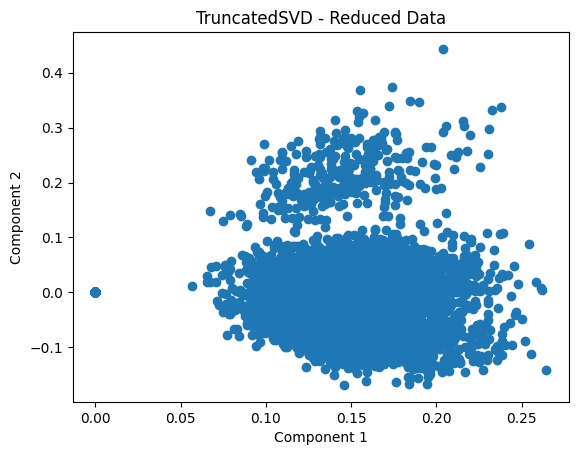

In [312]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('TruncatedSVD - Reduced Data')
plt.show()

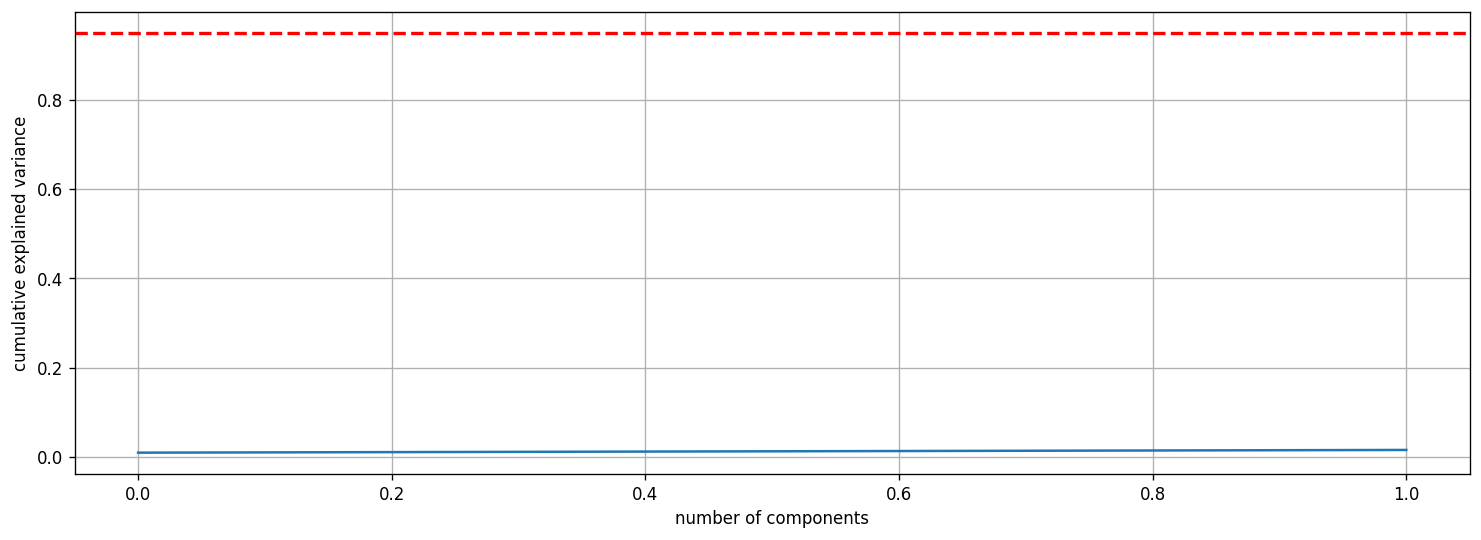

In [313]:
# Lets plot explained var v/s comp to check how many components to be considered.
 #explained var v/s comp
# Add a grid to the plot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5), dpi=120)
plt.plot(np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='--',linewidth=2, label='95% Explained Variance')
plt.grid()
plt.show()

**The plot aids in deciding how many components should be taken into account while dimensionality is being reduced. You can decide how many components must be present for the cumulative explained variance to meet a certain standard, such as 95%. You can choose the right number of components for your study by looking at the point where the curve crosses or is closest to the threshold line.**

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

**Truncated SVD is different from regular SVDs in that it produces a factorization where the number of columns is equal to the specified truncation.**

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

In [317]:
svd_tuned = TruncatedSVD(n_components=2)

In [318]:

# Fit the TruncatedSVD model on the input data, X
svd_tuned.fit(X)

TruncatedSVD()

In [319]:
X_transformed = svd_tuned.transform(X)

In [320]:
print(X_transformed.shape)

(7787, 2)


### 8. Data Splitting

In [321]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(df[["country","release_year","rating","duration","cast","type"]], df,test_size=0.5)

In [322]:
len(X_train)

3893

In [323]:
len(X_test)

3894

##### What data splitting ratio have you used and why?

I have used 80 to 20 ratio . Because it gives more efficient result.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 **The Elbow method graph**

**Clustering with K-Means The Elbow Technique**

**In the Elbow approach, the number of clusters (K) is truly variable and ranges from 1 to 10. We are calculating WCSS (Within-Cluster Sum of Square) for each value of K. The squared distance between each point and a cluster's centroid is added up to form WCSS. The plot of the WCSS with the K value resembles an elbow. The WCSS value will begin to drop as the number of clusters rises. The highest WCSS value is at K = 1. When we examine the graph, we can observe that it abruptly changes at one point, forming an elbow. From this point on, the graph nearly moves in line with the X-axis. The K factor corresponding to this point is the optimal value of K or an optimal number of clusters.**

In [324]:
# convert X into array form for clustering
X = X_tfidf.toarray()

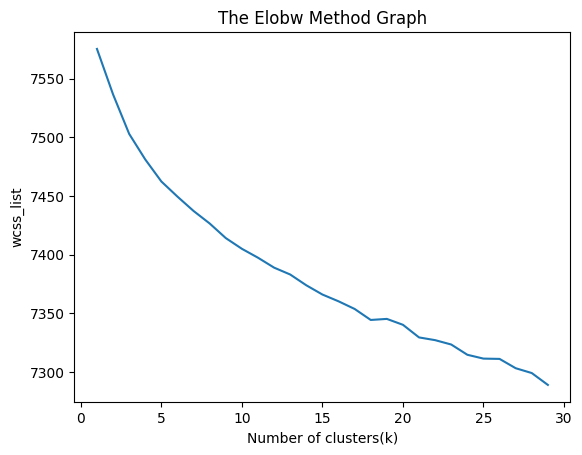

In [325]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 30.
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss_list)
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [326]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

from sklearn.metrics import silhouette_score
#sillhoute score of clusters
sill = []
for i in range(2,30):
    model = KMeans(n_clusters=i,init ='k-means++',random_state=51)
    model.fit(X)
    y1 = model.predict(X)
    score = silhouette_score(X,y1)
    sill.append(score)
    print('cluster: %d \t Sillhoute: %0.4f'%(i,score))

cluster: 2 	 Sillhoute: 0.0040
cluster: 3 	 Sillhoute: 0.0054
cluster: 4 	 Sillhoute: 0.0059
cluster: 5 	 Sillhoute: 0.0058
cluster: 6 	 Sillhoute: 0.0059
cluster: 7 	 Sillhoute: 0.0059
cluster: 8 	 Sillhoute: 0.0057
cluster: 9 	 Sillhoute: 0.0054
cluster: 10 	 Sillhoute: 0.0055
cluster: 11 	 Sillhoute: 0.0050
cluster: 12 	 Sillhoute: 0.0056
cluster: 13 	 Sillhoute: 0.0059
cluster: 14 	 Sillhoute: 0.0059
cluster: 15 	 Sillhoute: 0.0054
cluster: 16 	 Sillhoute: 0.0060
cluster: 17 	 Sillhoute: 0.0052
cluster: 18 	 Sillhoute: 0.0048
cluster: 19 	 Sillhoute: 0.0060
cluster: 20 	 Sillhoute: 0.0055
cluster: 21 	 Sillhoute: 0.0058
cluster: 22 	 Sillhoute: 0.0057
cluster: 23 	 Sillhoute: 0.0056
cluster: 24 	 Sillhoute: 0.0063
cluster: 25 	 Sillhoute: 0.0051
cluster: 26 	 Sillhoute: 0.0062
cluster: 27 	 Sillhoute: 0.0062
cluster: 28 	 Sillhoute: 0.0059
cluster: 29 	 Sillhoute: 0.0061


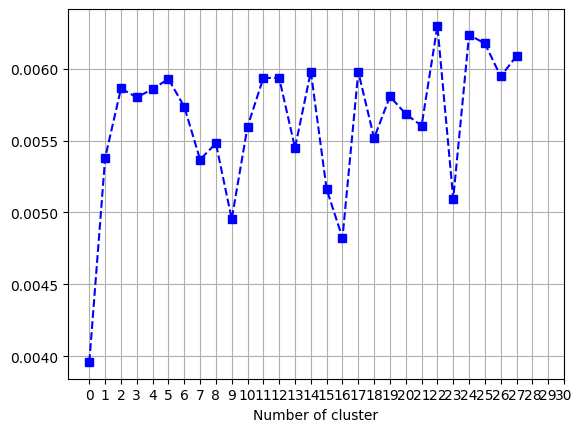

In [327]:
# Visualizing evaluation Metric Score chart
#Plotting Sillhoute's score
plt.plot(sill,'bs--')
plt.xticks(list(range(0,31)),list(range(0,31)))
plt.grid(),plt.xlabel('Number of cluster')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [328]:

# Fit the Algorithm

# Predict on the model
#training the K-means model on a dataset
kmeans = KMeans(n_clusters= 26, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(X)

In [329]:
#Predict the clusters and evaluate the silhouette score

score = silhouette_score(X, y_predict)
print("Silhouette score is {}".format(score))

Silhouette score is 0.005250567951185363


In [330]:
#Adding a seperate column for the cluster
df["cluster"] = y_predict

In [331]:
df['cluster'].value_counts()

9     608
14    503
3     474
15    468
10    461
1     449
12    406
25    394
17    310
4     308
8     303
7     299
13    296
2     286
5     257
23    228
19    224
18    223
11    218
0     210
16    175
22    157
21    149
24    137
6     135
20    109
Name: cluster, dtype: int64

<Axes: xlabel='cluster', ylabel='count'>

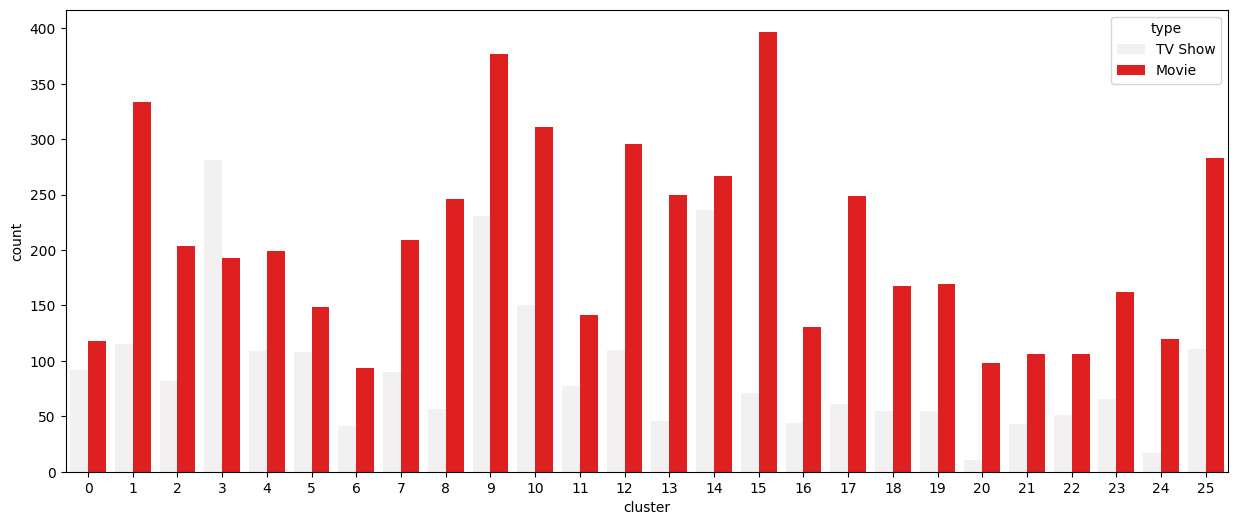

In [332]:
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='cluster', hue='type',lw=5, color='red', data=df, ax=ax)

In [333]:
#SCATTER PLOT FOR CLUSTERS
fig = px.scatter(df, y="description", x="cluster",color="cluster")
fig.update_traces(marker_size=100)
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique.**

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**YES**

### ML Model - 2 **Hierarchical clustering**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**In hierarchical clustering, each group (or "node") relates to two or more succeeding groups in a cluster tree (a dendrogram) used to display the data. The groupings are nested and arranged in a tree-like structure, which should produce a useful classification scheme.**

**Each node in the cluster tree holds a collection of related data; nodes cluster on the graph close to other nodes that share their characteristics. The process continues until all nodes are in the tree, which provides a visual representation of the data contained in the entire set. Clusters at one level join with clusters at the next level up, using a degree of similarity. Before you begin creating the tree, the total number of clusters is not known.**

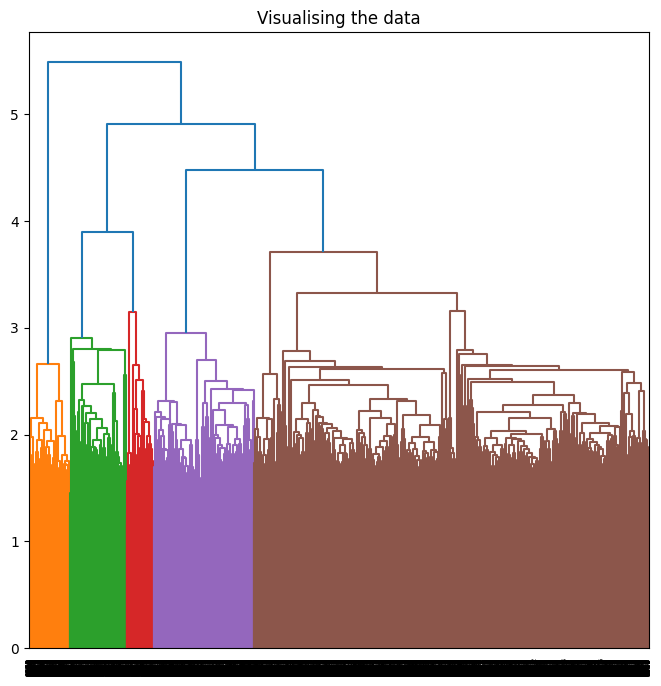

In [334]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

**A dendrogram is a diagram that depicts the relationship between things in terms of hierarchy. It is frequently produced as a byproduct of hierarchical clustering. A dendrogram is mostly used to determine how to assign objects to clusters.**

In [336]:
# Visualizing evaluation Metric Score chart
#Fitting our variable in Agglomerative Clusters
from sklearn.cluster import AgglomerativeClustering
aggh = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
aggh.fit(X)
#Predicting using our model
y_hc=aggh.fit_predict(X)

In [337]:
df_hierarchical =df.copy()
#creating a column where each row is assigned to their separate cluster
df_hierarchical['cluster'] = aggh.labels_
df_hierarchical.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  ...  \
0 2020-08-14    2020.00000  TV-MA  4 Seasons  ...   
1 2016-12-23    2016.00000  TV-MA     93 min  ...   
2 2018-12-20    2011.00000      R     78 min  ...   
3 2017-11-16    2009.00000  PG-13     80 min  ...   
4 2020-01-01    2013.93258  PG-13    123 min  ...   

                                         description day_added  year_added  \
0  In a future where the elite inhabit an island ...      14.0      2020.0   
1  After a devastating earthquake hits Mexico Cit...      23.0      2016.0   
2  When an army recruit is found dead, his fellow...      20.0      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...      16.0      2017.0   
4  A brilliant group of students become card-coun...       1.0      2020.0   

   month_added             Genres target_ages count  \
0          8.0                 []      Adults     1   
1         12.0            [Drama]      Adults     1   
2         12.0           [Horror]      Adults     1   
3         11.0  [ActionAdventure]       Teens     1   
4          1.0            [Drama]       Teens     1   

                                          clustering  \
0                                                NaN   
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...   
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...   
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...   
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...   

                                          Clean_Text cluster  
0                                                NaN       0  
1  jorge michel grau demián bichir, héctor bonill...       0  
2  gilbert chan tedd chan, stella chung, henley h...       0  
3  shane acker elijah wood, john c. reilly, jenni...       0  
4  robert luketic jim sturgess, kevin spacey, kat...       0  

[5 rows x 21 columns]

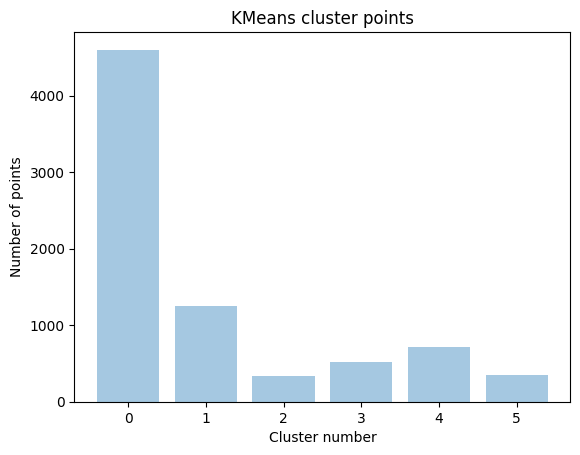

In [338]:
#Analysing number of points present in each clusters
plt.bar([x for x in range(6)], df_hierarchical.groupby(['cluster'])['description'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [339]:
#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(X, aggh.labels_, metric='euclidean'))

Silhouette Coefficient: -0.002


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**yes we have seen the improvement in silhouette cofficient.**

Answer Here.

### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

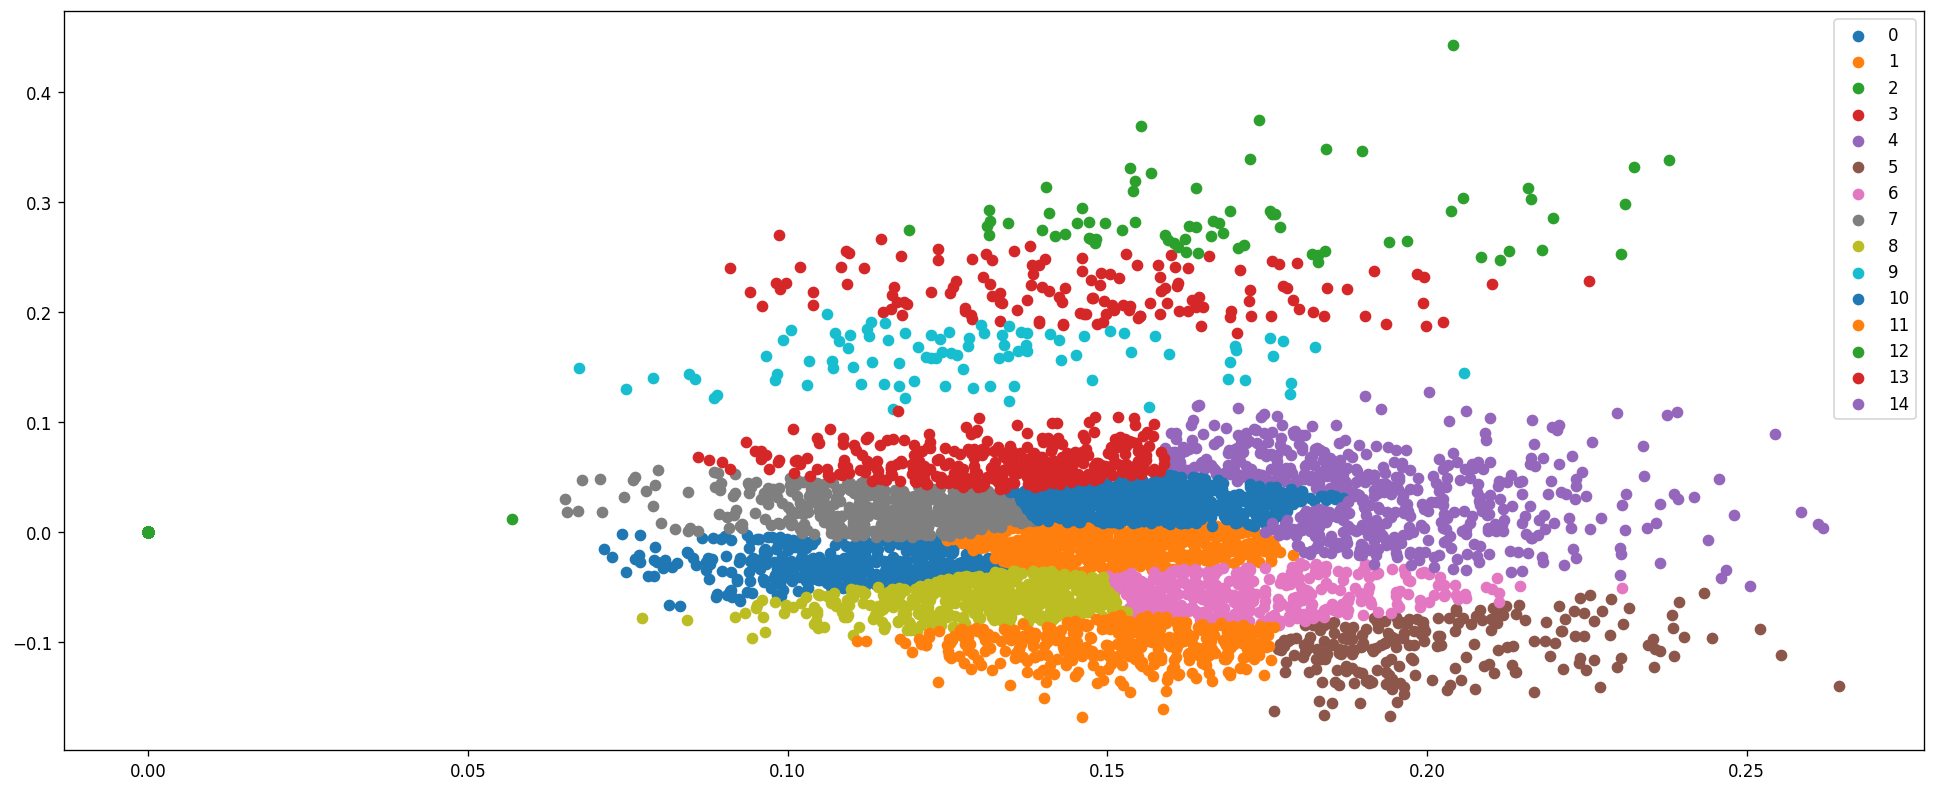

In [335]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()

In [340]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [341]:
df.head(1)

show_id     type title director  \
0      s1  TV Show    3%      NaN   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  ... day_added year_added  month_added  \
0        2020.0  TV-MA  4 Seasons  ...      14.0     2020.0          8.0   

   Genres  target_ages count clustering  Clean_Text cluster cluster_number  
0      []       Adults     1        NaN         NaN       2              2  

[1 rows x 22 columns]

In [342]:
# Count the number of movies or TV shows in each cluster
cluster_content_count = df['cluster_number'].value_counts().reset_index().rename(columns={'index': 'clusters', 'clusters': 'Movies/TV_Shows'})

# Print the cluster content count
print(cluster_content_count)

    clusters  cluster_number
0          2            2976
1         10             646
2          1             545
3          7             515
4          8             501
5          0             428
6         11             383
7          6             377
8         13             355
9          4             296
10        14             249
11         5             216
12         3             138
13         9              91
14        12              71


In [345]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def word_count(category):
  print("Exploring Cluster", category)
  col_names = ['type','title','country','rating','listed_in','description']
  for i in col_names:
    df_word_cloud = df[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])
    # Create stopword list:
    stopwords = set(STOPWORDS)
  # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)
  # Display the generated image:
  # the matplotlib way:
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    print("Looking for insights from", i ,"Movies/TV Shows")

    plt.show()

Exploring Cluster 9
Looking for insights from type Movies/TV Shows


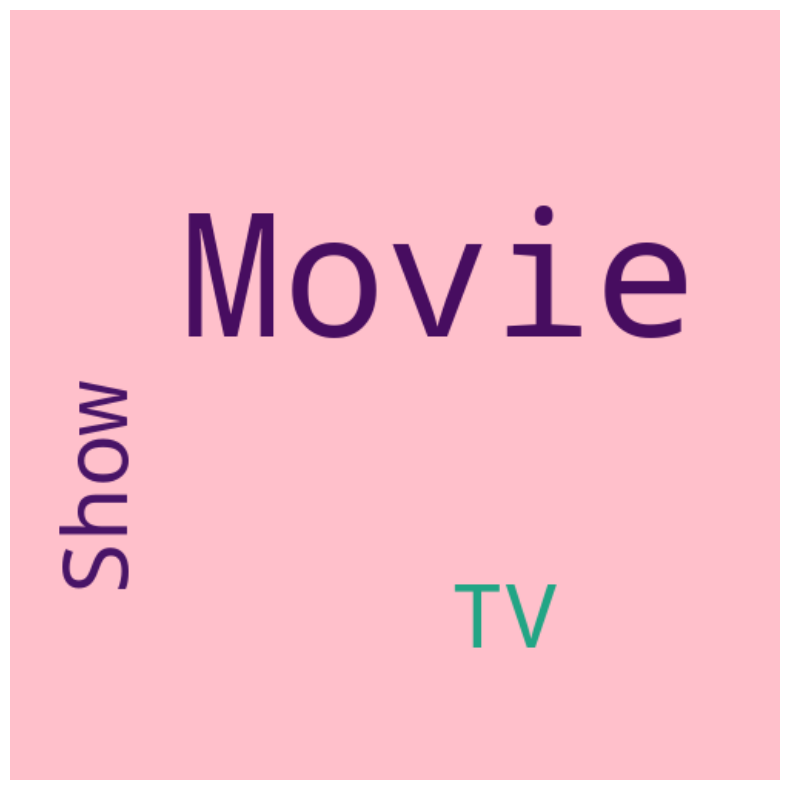

Looking for insights from title Movies/TV Shows


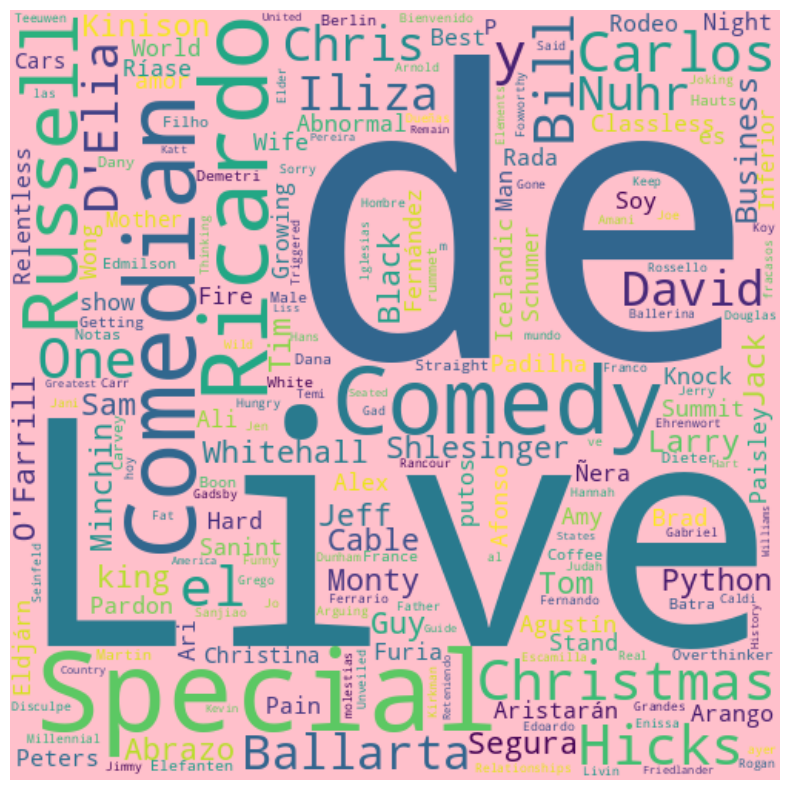

Looking for insights from country Movies/TV Shows


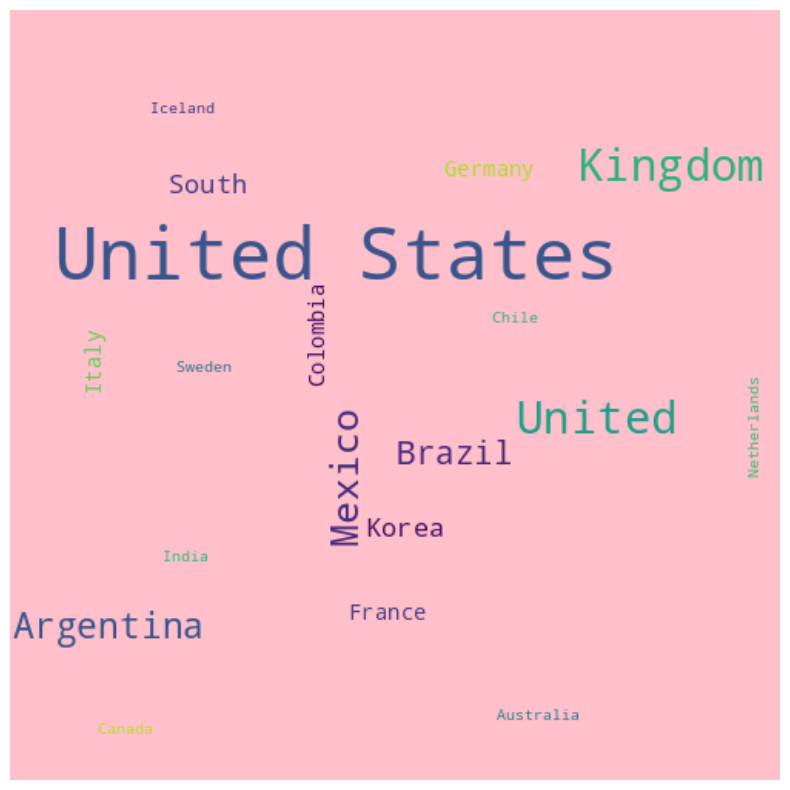

Looking for insights from rating Movies/TV Shows


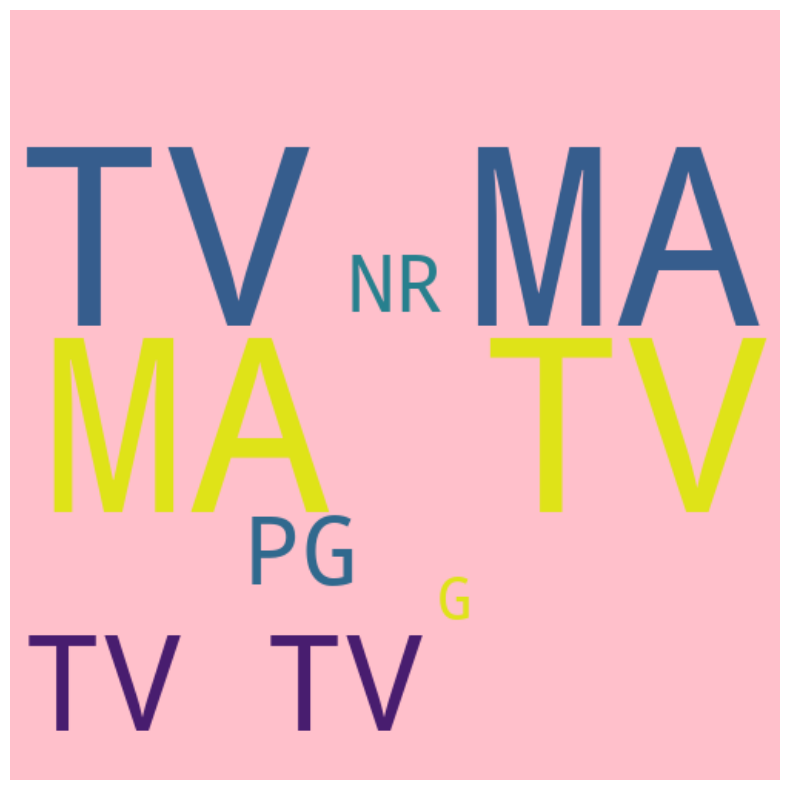

Looking for insights from listed_in Movies/TV Shows


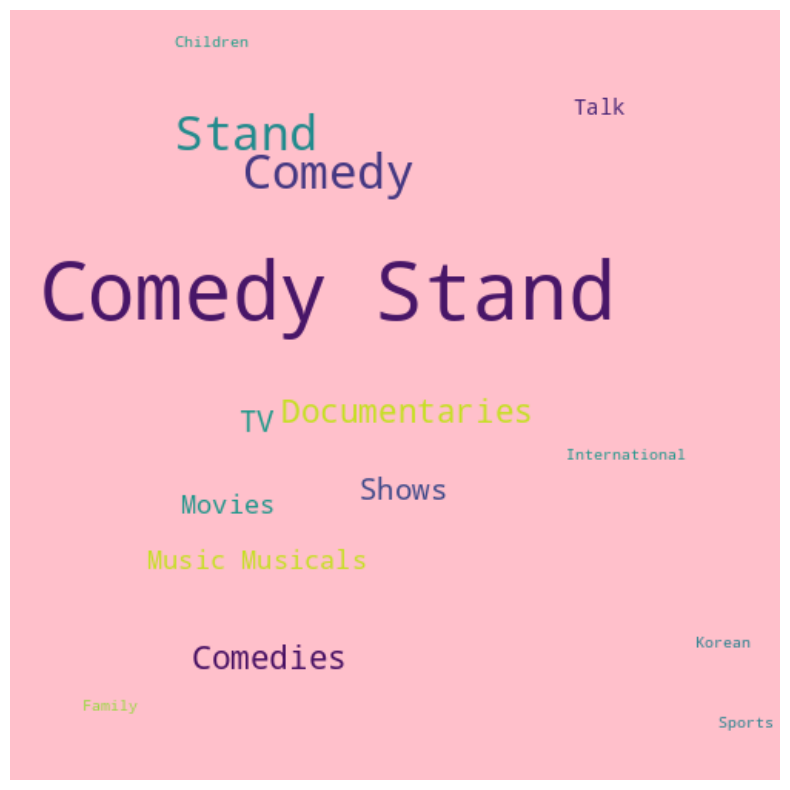

Looking for insights from description Movies/TV Shows


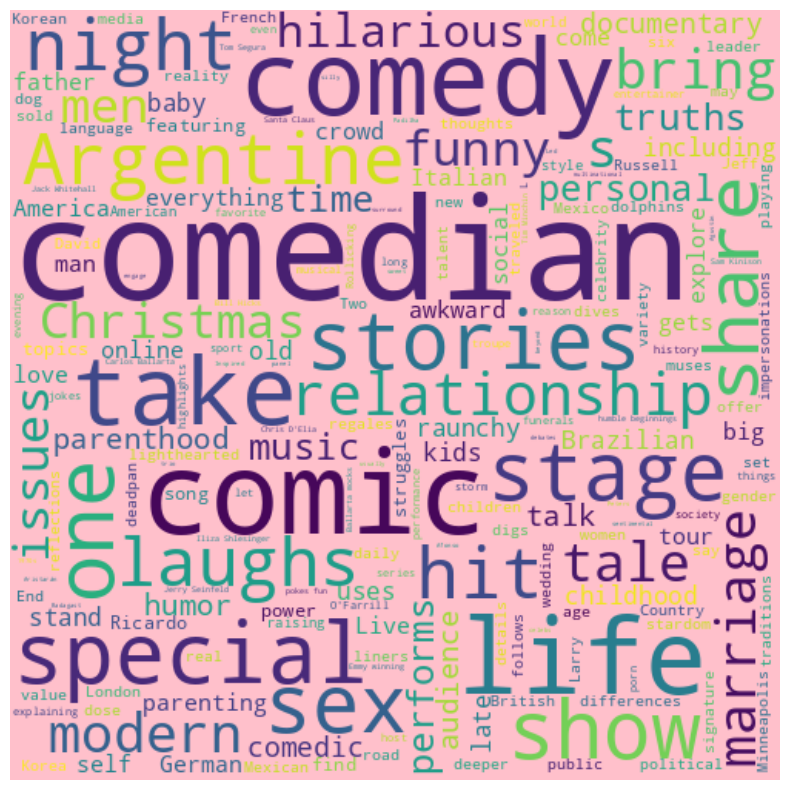

In [346]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type - Movie & Tv shows**

**Title - Broadway,Remastered,Christmas ,Friends Orchestra**

**Country- United Kingdom,Argentina,United States,India**

**Rating -TV-MA,PG-TV**

**Listed_in - Dramas International,Musical Dramas,Musicial Documentaries,Comedies International**

**Description- Documentary ,Music,One,Bad,Tour ,Love.**

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


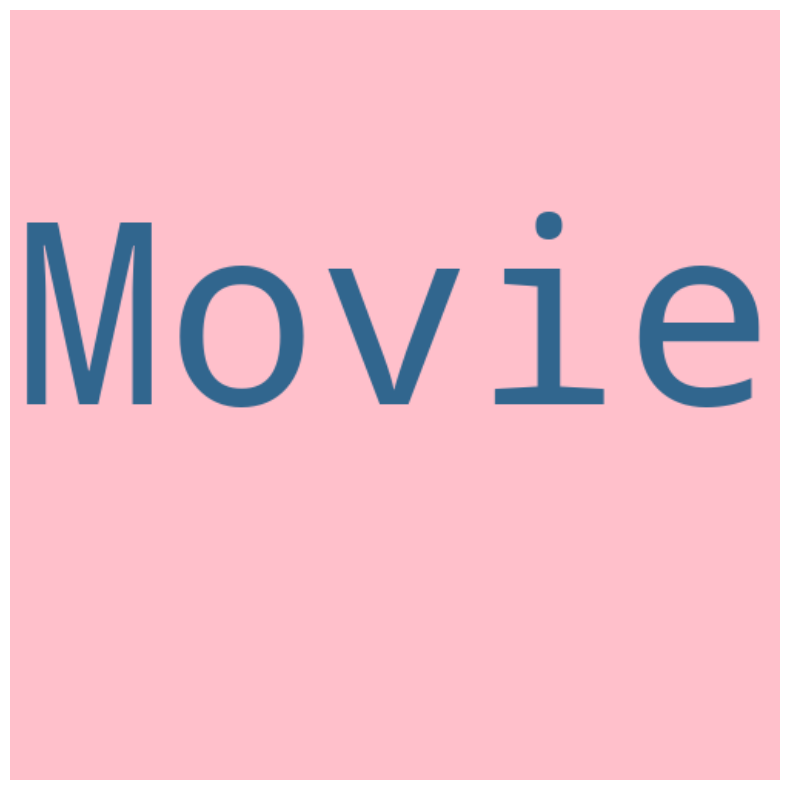

Looking for insights from title Movies/TV Shows


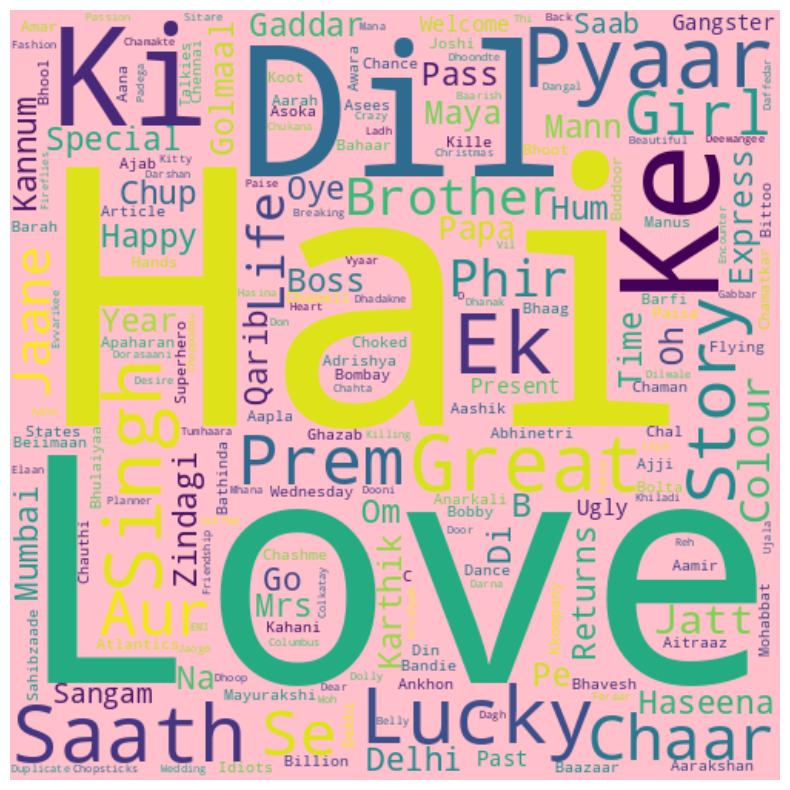

Looking for insights from country Movies/TV Shows


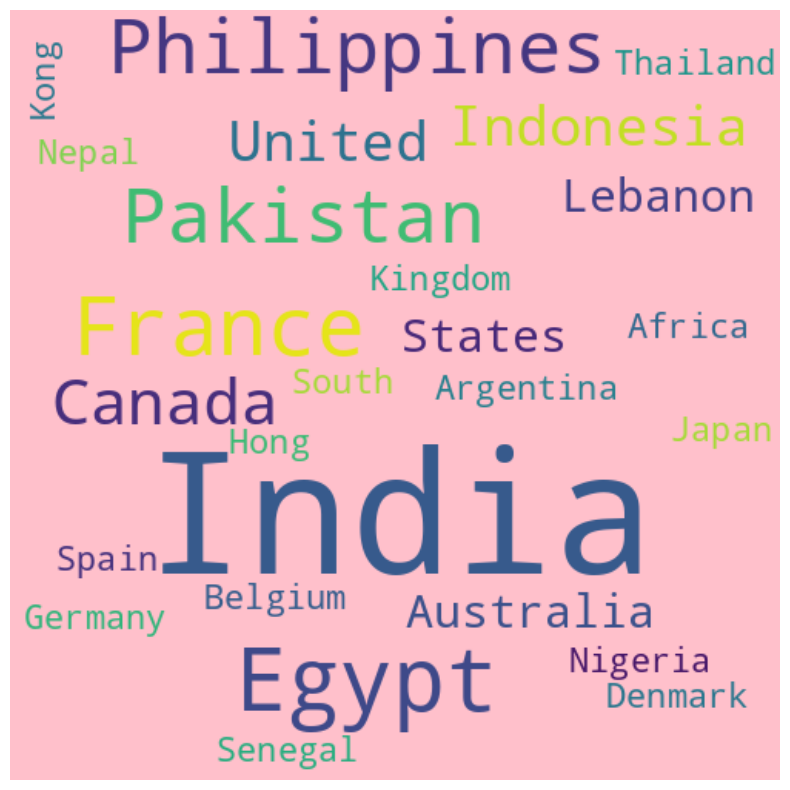

Looking for insights from rating Movies/TV Shows


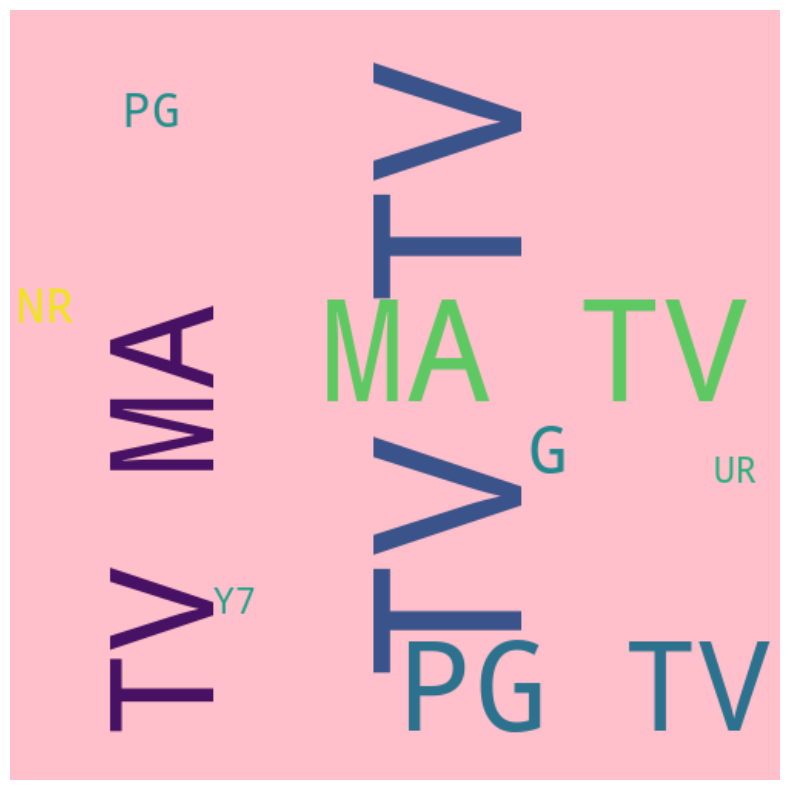

Looking for insights from listed_in Movies/TV Shows


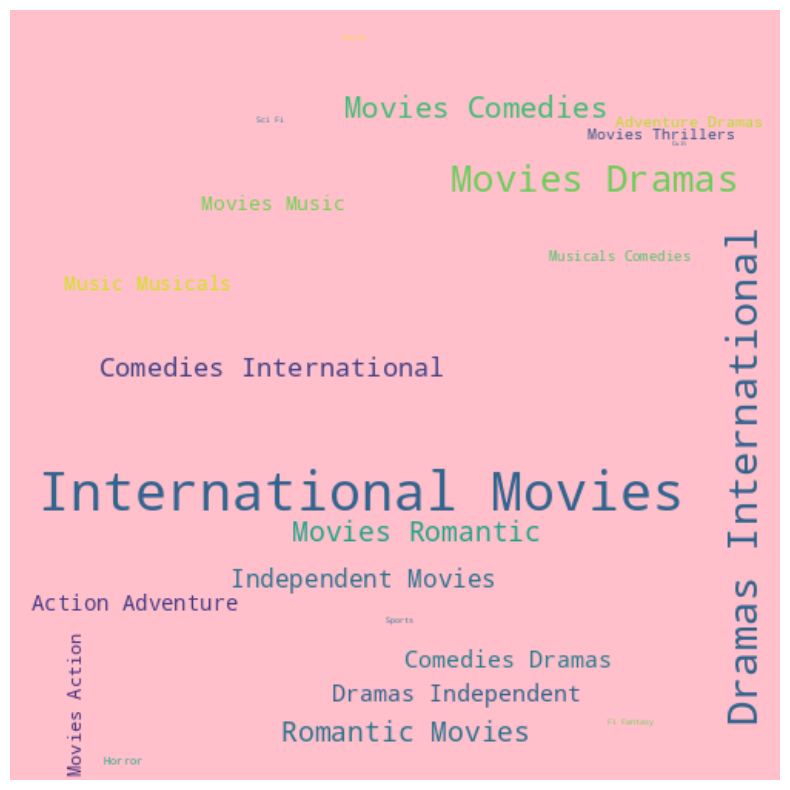

Looking for insights from description Movies/TV Shows


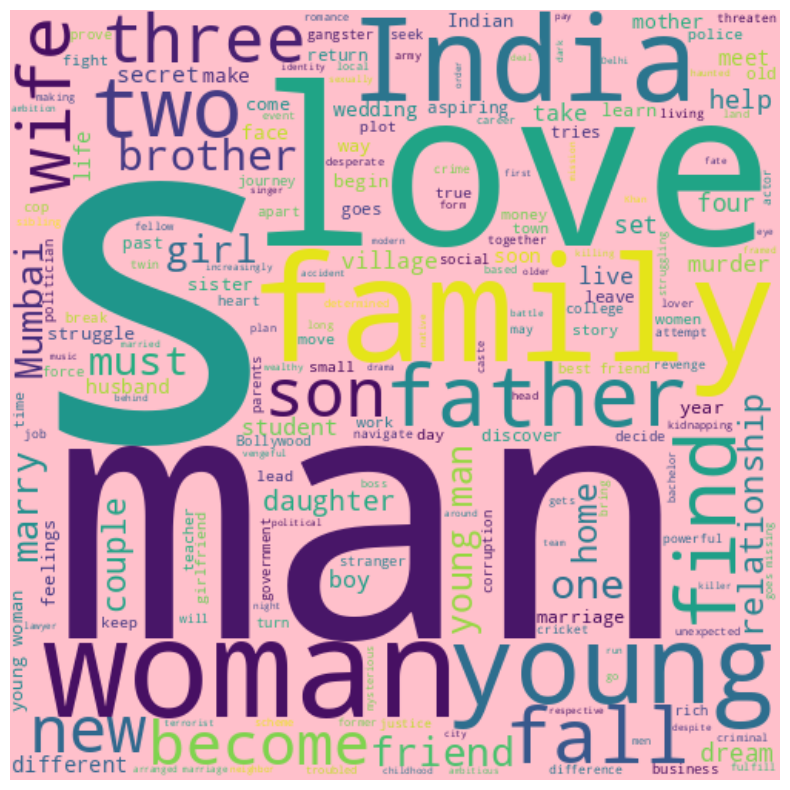

In [347]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

**Type - Movie & Tv shows**

**Title - Special, America,Time,Live,Comedy, Netflix Alive, Martin**

**Country - United States,Brazil,Mexico,Italy**

**Rating -TV-MA,TV-PG**

**Listed_in - Tv-Comedies, Comedy Stand, Talk shows**

**Description- Stand Comedy, Comic, Take, Life, Live, Share,Stories.**

 # **RECOMMENDER SYSTEM**

**A sort of information filtering system known as a recommender system makes recommendations to users based on their preferences, interests, or previous actions. It frequently appears in a variety of applications, including social media, streaming services, and e-commerce websites. A recommender system's objective is to offer each user-specific recommendations that are pertinent and beneficial.**

**Content-based filtering suggests products that are comparable to those that a user has previously shown interest in or interaction with. It looks for comparable goods to recommend after analysing the contents or characteristics of the objects. For instance, if a customer enjoys viewing action films, the system can suggest additional action films based on performers, genre, or story.**

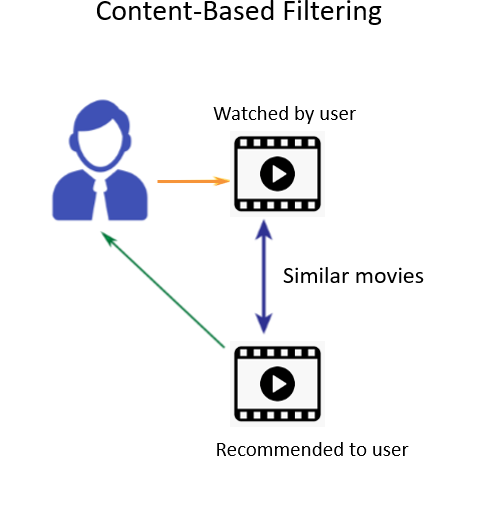

In [348]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [349]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['description'] = df['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [350]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel
# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [351]:
cosine_sim

array([[1.        , 0.        , 0.05827946, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09600035, 0.        ,
        0.        ],
       [0.05827946, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09600035, 0.        , ..., 1.        , 0.        ,
        0.02819239],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02819239, 0.        ,
        1.        ]])

In [352]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [353]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]


In [354]:
df['title'][1:70]

1                                                  7:19
2                                                 23:59
3                                                     9
4                                                    21
5                                                    46
                            ...                        
65                                              13 Sins
66                                                 13TH
67    13TH: A Conversation with Oprah Winfrey & Ava ...
68                                            14 Blades
69                                           14 Cameras
Name: title, Length: 69, dtype: object

In [355]:
get_recommendations( '14 Cameras',cosine_sim)

5064                           Ragini MMS
5425                  Scandal in Sorrento
2383                               Get In
541                                  Anon
7568                       What We Wanted
2087    Fabulous Lives of Bollywood Wives
7095                           Time Share
6975                         The Vanished
1092                             Breakout
5465                Secreto bien guardado
Name: title, dtype: object

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Since Silhoutte Score evaluates how well each data point in a cluster is separated from neighbouring clusters, we picked it over Distortion Score (also known as inertia or sum of squared distances) as an evaluation metric. Higher numbers denote better cluster separation. Its range is -1 to 1. The data point is well-matched to its own cluster and poorly-matched to neighbouring clusters if the silhouette score is close to 1. The data point is on or very close to the boundary between two clusters if the score is close to zero. If the result is close to -1, the data point is presumably in the wrong cluster.**

**Use of silhouette score has the following benefits over distortion score:**

**While distortion score just takes into consideration the compactness of each cluster, silhouette score also examines the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are distinct).
While distortion score tends to favour spherical clusters, which are not entirely present in our situation, silhouette score is less sensitive to the shape of the clusters.
Since each data point is given a score rather than simply a single number for the complete clustering solution, the results of the silhouette score are more understandable and intuitive.**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Given that we obtained a comparably high Silhoutte Score during K-means clustering and that the resulting clusters are clearly distinguished from one another in all three dimensions, we decided to choose K-means as our final model.
Additionally, K-means performs better than alternative clustering techniques in specific circumstances, including:
Speed: Since K-means requires fewer calculations and iterations than hierarchical clustering, it generally performs more quickly, especially when working with huge datasets.
Usefulness: K-means produces a clear segmentation of the data and is reasonably simple to execute and analyse. It only needs a few parameters, such as the number of clusters.
Scalability: In contrast to hierarchical clustering, K-means can handle datasets with a large number of variables or dimensions.
computation-intensive as the number of dimensions and data points rises.**

**Independence of clusters: Hierarchical clustering might result in overlapping clusters or clusters that are nested inside of one another, which may not be ideal for some applications. K-means, on the other hand, creates non-overlapping clusters.**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [356]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [357]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

# **EDA**
**Release dates of shows/movies on Netflix**

>* **Most Movies streaming on the platform were released after 2010.**

>* **Most TV Shows streaming on the platform were released after 2015.**

>* **The year 2017 had highest number of Movie and TV show releases on the platform.**

**Number of shows/movies added by the Streaming giant**
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**

 **Type of content watched on netflix**
> * **TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%.**

**Type of Videos on Netflix**
> * **There are almost twice as many movies as TV shows on Netflix.**

**Content added over the year**
>* **The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.**

> **Top Genres in Netflix are:**
1. **Drama**
2.**Comedy**
3.**Documentary**
4.**Action and Adventure**
5.**Romance**

   **Has Netflix Been Focusing Increasingly on TV Shows as compared to movies**
   > * **The above graph depicts seasons of TV shows signed vs the movies signed**
> * **This distinction gives contacts as TV shows require recurring investment for each seasons. So the TV numbers have been increased in accordance to the seasons. As they were considered as one entity earlier**
> * **We can observe that TV shows signed have been higher than movies in 2016. While the the movies signed have been higher, it is blatantly visible that the TV shows signed per year is catching up to the movies signed by the year**

**Top 10 countries for movies**

>* **The United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies, demonstrating a significant presence in the global Movies/Tv shows market.**

**CONCLUSION FOR ML**

>* **It's noteworthy to notice that films make up the majority of the content offered by Netflix. However, the platform has been concentrating more on TV shows in recent years.**
 >* **The majority of these shows debut at the end of the year or the beginning.**
>* **Among the top five nations that create all of the content that is made available on the site are the United States and India. Furthermore, six of the top ten actors with the most content hail from India.**
 >* **According to content ratings, TV-MA is at the top of the list, showing that Netflix users prefer mature fare.**
 >* **Since k=15 was discovered to be the best value for clustering the data, it was utilised to divide the content into  ten distinct clusters.**
 >* **Cosine similarity was used to develop a content-based recommender system using this data, which offered suggestions for films and TV series.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***